In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from scipy import stats

Covid tweet ID

 https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

https://github.com/echen102/COVID-19-TweetIDs

#Legend

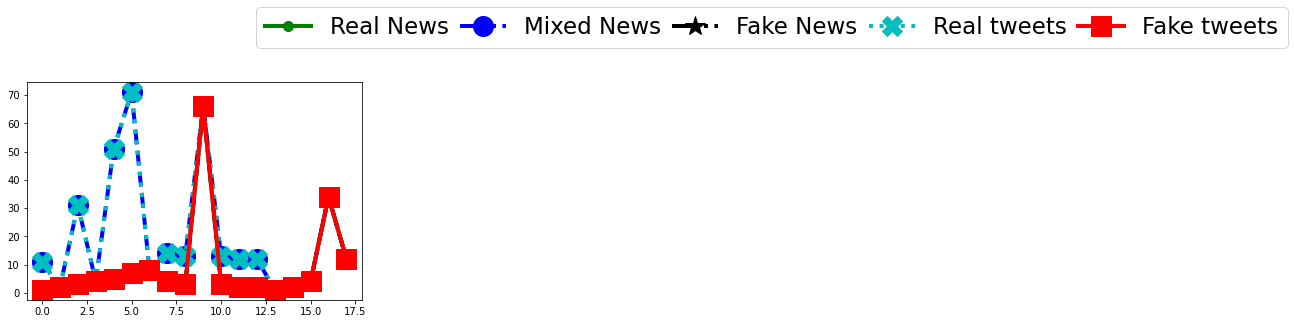

In [ ]:
X=[1,2,3,4,5,7,8,4,3,66,3,2,2,1,2,4,34,12]
Y=[11,2,31,4,51,71,8,14,13,66,13,12,12,1,2,4,34,12]
#plt.plot(X,'k',markersize=13, linewidth=16,label='News positiveness')
#plt.plot(Y,'g',markersize=13, linewidth=16,label='News negativeness')
#plt.legend(bbox_to_anchor=(.65, 1.0, 2.35, 0.4),loc='upper center',mode = "expand", ncol = 2, prop={'size': 23})   

Curve=['g.-','bo--','k*-.','cX:','rs-']
plt.plot(X,Curve[0],markersize=20, linewidth=4,label='Real News')
plt.plot(Y,Curve[1],markersize=20, linewidth=4,label='Mixed News')
plt.plot(X,Curve[2],markersize=20, linewidth=4,label='Fake News')
plt.plot(Y,Curve[3],markersize=20, linewidth=4,label='Real tweets')
plt.plot(X,Curve[4],markersize=20, linewidth=4,label='Fake tweets')
plt.legend(bbox_to_anchor=(.65, 1.0, 3.15, 0.4),loc='upper center',mode = "expand", ncol = 5, prop={'size': 23})   


#Tools

In [3]:
from scipy.optimize import curve_fit
def  Delete_last_row(DD):
   for i in range(len(DD)):
            if DD[i].shape[0]==10: 
                    DD[i].drop(DD[i].tail(1).index,inplace=True)
   return DD


############### Fitting Cureve
def func_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def func_Gaussian(x,a1,b1,c1,a2,b2,c2):
    return a1*np.exp(-((x-b1)/c1)**2) + a2*np.exp(-((x-b2)/c2)**2)

def func_Polynomial(x,p1,p2,p3):
    return  p1*np.power(x,2)  + (p2*x) + p3

def func_Power(x,a,b,c):
    return  a*(x**b)+c

def func_Rational(x,p1,p2,p3,q1,q2,q3):
    return  (p1*np.power(x,2) + (p2*x) + p3) /(np.power(x,3)  + q1*np.power(x,2)  + (q2*x) + q3)

def func_sine(x,a1,b1,c1):
    return a1*np.sin(b1*x+c1)

def func_Weibull(x,a,b):
    return a*b* (x**(b-1))*np.exp(-a*(x**b))
Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]


In [4]:
def Goodness_fitting(y,Y_hat):  #goodness-of-fit measure   
    Residu=np.sum(abs(y-Y_hat.reshape(-1,1)))
    RSS=np.sum((y-Y_hat.reshape(-1,1))**2)          # residual sum of squares  #The sum of squares due to error (SSE) 
    TSS=np.sum((y-y.mean())**2)       # total sum of squares
    R_2=1-(RSS/TSS)                  # the coefficient of determination or R_squared
    n=y.shape[0]
    Num_var=1                  #number of independent variables
    R_2_adj=1-(  (RSS/(n-Num_var-1))     / (TSS/(n-1))  )
    return Residu, RSS,TSS, R_2, R_2_adj

***All statistical test: ***https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Other:

***Various statistacal Tests:***
https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5

***Adaptive sampling:*** http://wangshusen.github.io/code/adaptivesampling.html

***Polynomias package:*** https://chaospy.readthedocs.io/en/master/

***Variance Based Sensitivity Analysis:*** https://github.com/LoLab-VU/varsens

***Surrogate Modelling/Sampling:*** https://idaes-pse.readthedocs.io/en/1.5.1/surrogate/pysmo/index.html

***Kernel density estimation:*** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

***Lyapounov stability theory: *** https://python-control.readthedocs.io/en/0.8.3/generated/control.lyap.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_continuous_lyapunov.html

In [5]:
##########################################   Normality Test    #################################################
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
#data = np.array(Harvey_dt_adult_d['anger'])
#[0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
def normality_test(data):
   stat, p = shapiro(data)
   #print('stat=%.3f, p=%.3f' % (stat, p))
   if p > 0.05:
	   explain='Probably Gaussian'
   else:
	   explain='Probably not Gaussian'
   return p,explain


##########################################   correlation    #####################################################
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import (kendalltau,rankdata)
from scipy.stats import chi2_contingency   #the Chi-Squared Test


def Corr_summ(X,Y):
  X=np.array(X)
  Y=np.array(Y)
  A=np.zeros([len(X)])
  B=np.zeros([len(Y)])
  for i in range(len(A)): 
      A[i]=X[i]
      B[i]=Y[i]
  corr1,p1 = pearsonr(A,B)           #p<0.05 : dependent
  corr2,p2 = spearmanr(A,B)
  corr3=np.dot (A, B)/(np.linalg.norm (A) * np.linalg.norm (B))
  corr4,p4=kendalltau(A,B)
  #corr5, p5, dof, expected = chi2_contingency(A,B)
  if p1 > 0.05:
	      explain1='Probably independent'
  else:
	      explain1='Probably dependent'
  return corr1,p1,explain1,corr2,p2,corr3,corr4,p4


##########################################   Stationary test  #####################################################
from statsmodels.tsa.stattools import adfuller   #A stationary time series is one whose properties do not depend 
                                                 # on the time at which the series is observed. Thus, time series                                               
                                                 # with trends, or with seasonality, are not stationary
def time_dependant(data):
    stat, p, lags, obs, crit, t = adfuller(data)
    #print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
	      explain='Probably not Stationary'
    else:
       	explain='Probably Stationary'
    return  p, explain  


#############################   Parametric Statistical Hypothesis Tests  ##########################################
from scipy.stats import ttest_ind   # Example of the Student's t-test
from scipy.stats import ttest_rel   # Example of the Paired Student's t-test
from scipy.stats import f_oneway # Example of the Analysis of Variance Test

#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

def para_hypothesis(data1,data2):
     stat1, p1 = ttest_ind(data1, data2)
     stat2, p2 = ttest_rel(data1, data2)
     stat3, p3 = f_oneway(data1, data2)
     #print('stat=%.3f, p=%.3f' % (stat, p))
     if p1 > 0.05:
	         explain1='Probably the same distribution'
     else:
	         explain1='Probably different distributions'
     return  stat1, p1,explain1 


#############################   Nonparametric Statistical Hypothesis Tests  ########################################
from scipy.stats import mannwhitneyu # Example of the Mann-Whitney U Test
from scipy.stats import wilcoxon # Example of the Wilcoxon Signed-Rank Test
from scipy.stats import kruskal # Example of the Kruskal-Wallis H Test
from scipy.stats import friedmanchisquare # Example of the Friedman Test
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
def Non_para_hypothesis(data1,data2):
      stat1, p1 = mannwhitneyu(data1, data2)
      #stat2, p2 = wilcoxon(data1, data2)
      stat3, p3 = kruskal(data1, data2)
      #stat4, p4 = friedmanchisquare(data1, data2, data3)
      #print('stat=%.3f, p=%.3f' % (stat, p))
      if p1 > 0.05:
	         explain1='Probably the same distribution'
      else:
	         explain1='Probably different distributions'
      return  stat1, p1,explain1 


##############      Estimate the probability density function (PDF) of a random variable in a non-parametric way     #############
from scipy import stats
def kernel_estimate(data):
    #XX=np.linspace(-3,3,1000)
    #values=XX
    data=np.array(data)
    print(data)
    kernel = stats.gaussian_kde(data.astype(float))  #Estimate the probability density function (PDF) of a random variable in a non-parametric way
    #positions=np.vstack([XX.ravel()])
    #Z = np.reshape(kernel(positions).T, XX.shape)
    #plt.plot(Z)
    #kernel.evaluate(-2)           # probablity of one point Pdf 
    #kernel.integrate_box_1d(0,4)   # 1D Integral between two pints
    return kernel


################################################# Quantile-quantile plot   ############################################################
def QQ_plot(X,Y,Z_title):
   XX=np.linspace(0,1,1000)
   plt.plot(XX,XX,'r')
   plt.scatter(np.sort(X), np.sort(Y), s=180)
   #plt.scatter(np.sort(X), np.sort(Y), s=400,c='lightblue')
   plt.xlabel('Real obseravtion Quantiles', fontsize=20)
   plt.ylabel('Simulation Quantiles', fontsize=20)
   Z_title
   plt.title(Z_title, loc='left',y=0.65,fontsize = 15, style='italic')
   plt.xlim([0, 1])
   plt.ylim([0, 1])
   plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
def Satat_analysis(X,Y,Z_title):
   p_a,explain_a=normality_test(X)
   p_b,explain_b=normality_test(Y)
   corr1,p1,explain1,corr2,p2,corr3,corr4,p4=Corr_summ(X,Y)
   p_c, explain_c  =time_dependant(X)
   p_d, explain_d  =time_dependant(Y)
   stat_e, p_e,explain_e =para_hypothesis(X,Y)
   stat_f, p_f,explain_f =Non_para_hypothesis(X,Y)
   kernel=kernel_estimate(X)
   QQ_plot(X,Y,Z_title)
   return p_a,explain_a,p_b,explain_b,corr1,p1,explain1,corr2,p2,corr3,corr4,p4,p_c, explain_c,p_d, explain_d, stat_e, p_e,explain_e ,stat_f, p_f,explain_f, kernel 


#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#Satat_analysis(data1,data2)

In [7]:
#####################          Cleaning dataSET           #############################333

import nltk
nltk.download('stopwords')
import re
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
#from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


def remove_html(text):
    """Remove special patterns - email, url, date etc."""
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    ## remove
    text = url_regex.sub("", text)
    text = email_regex.sub("", text)
    text = date_regex.sub("", text)
    return text



def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct



#1 No tokenize
#tokenized_text=result2.lower()

#2 Tokenize
word_tokenizer = regexp.WhitespaceTokenizer()
#tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]


def remove_stopwords(text):
    words=[w for w in text if w not in stopwords.words('english')]
    return words

  
stemmer=PorterStemmer()
def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i) for i in text])
    return stem_text


def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['text'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'texte_cleaned']=result4
  return ALL_Data_fake

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#GoogleTrends

In [ ]:
################### Google Trend ################################
!pip install pytrends

Geo Names: https://www.geonames.org/

https://www.geonames.org/countries/

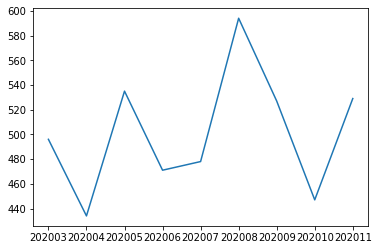

In [ ]:
################### Google Trend ################################
import time
from pytrends.request import TrendReq
pytrend = TrendReq()

geoname_list=['AU','SG','KR','GB','US-AL']
Social_dysfunction_list=['Boredom','Loneliness', 'Impairment']
Anxiety_list=['Irritability','Panic','Sleep','Stress', 'Worry']
Happiness_list=['Contentment','Sadness','Suicide','Wellbeing','Divorce']
List=[Social_dysfunction_list,Anxiety_list]



keywords=Happiness_list
timeframe1='2020-03-01 2020-11-30'
timeframe2='today 2-y'
pytrend.build_payload(kw_list=keywords,cat=0,timeframe=timeframe1,geo='US')
data = pytrend.interest_over_time()
data['time']=data.index
data['Time']=''
data.index=range(data.shape[0])
for i in range(data.shape[0]):
  Y= time.strftime('%Y%m', time.strptime(str(data['time'][i])[:7],"%Y-%m"))
  data.at[i,'Time']=Y
data=data.drop(columns=['time','isPartial'], axis=1)
data_Trend= data.groupby(['Time']).sum()
data_Trend.head(10)

#Curve=data_Trend['Boredom']+data_Trend['Loneliness']+data_Trend['Impairment']
#Curve=data_Trend['Irritability']+data_Trend['Panic']+data_Trend['Sleep']+data_Trend['Stress']+data_Trend['Worry']
Curve=data_Trend['Contentment']+data_Trend['Sadness']+data_Trend['Suicide']-data_Trend['Wellbeing']+data_Trend['Divorce']
plt.plot(Curve)

#Usefule websites

Tweeter historical database

https://catalog.docnow.io/

https://tweetsets.library.gwu.edu/
   
https://snap.stanford.edu/data/

Hydrate

https://github.com/lopezbec/COVID19_Tweets_Dataset/blob/master/Old_Tweets_ID_by_keyword/Automatically_Hydrate_TweetsIDs_COVID19.ipynb

Refrences:
https://programminghistorian.org/en/lessons/beginners-guide-to-twitter-data

https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4

Example: https://github.com/hectoramirez/Language-localization_FIFA

Tweeter REST API: https://towardsdatascience.com/downloading-data-from-twitter-using-the-rest-api-24becf413875

Fact cheking

https://leadstories.com/

https://www.politifact.com/

https://www.poynter.org/covid-19-poynter-resources/

https://www.factcheck.org/a-guide-to-our-coronavirus-coverage/

https://www.snopes.com/

https://euvsdisinfo.eu/

Newsguard is a browser extension that manually labels websites on a score from 0-100 on reputability, though.

Covid 19

https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

Mapping
https://www.tableau.com/

https://programminghistorian.org/en/lessons/mapping-with-python-leaflet

https://digitalfellows.commons.gc.cuny.edu/2019/06/03/finding-the-right-tools-for-mapping/

Web scrapper

https://www.webscraper.io/tutorials

Creat a world map

https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10



# News from media

In [ ]:
true_news.shape[0]+half_true_news.shape[0]+false_news.shape[0]

927

In [ ]:
#politifact
true_news=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/True_news.xlsx')
half_true_news=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/Mixed_news.xlsx')
false_news=pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/false_news.csv')
#Snopos
Snopos_news=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/Snopos_news.xlsx')
#Poynter
Poynter_news=pd.read_csv('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/Poynter_news.csv')
#factcheck
factcheck=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/factcheck.xlsx')


Politifact_news=[true_news,half_true_news,false_news]
Politifact_news_lable=['true_news','half_true_news','false_news']
for i in range(len(Politifact_news_lable)):
  for j in range(Politifact_news[i].shape[0]):
       Politifact_news[i].at[j,'key_words']=" ".join(Politifact_news[i]['key_words'][j].split())
       Politifact_news[i].at[j,'Sourse']=" ".join(Politifact_news[i]['Sourse'][j].split())
for i in range(Poynter_news.shape[0]):
   Poynter_news.at[i,'title']=Poynter_news['title'][i].replace('FALSE:','').replace('False:','')
for i in range(factcheck.shape[0]):
  if type(factcheck['issue'][i])== str:
      factcheck.at[i,'issue']=" ".join(factcheck['issue'][i].split()).replace('Issue','') 
  if type(factcheck['Misconceptions'][i])== str:    
      factcheck.at[i,'Misconceptions']=" ".join(factcheck['Misconceptions'][i].split()).replace('Misconceptions','')  
for i in range(Snopos_news['subject'].shape[0]):
    if type(Snopos_news['subject'][i])== str: 
        string2=Snopos_news['subject'][i]
        string_length=len(string2)+1
        Snopos_news.at[i,'subject']=string2.rjust(string_length)


for i in range(len(Politifact_news)):
   if i==0:
     Politifact_news[i]=Politifact_news[i].drop( ['Unnamed: 0', 'Unnamed: 0.1', 'web-scraper-order',
       'web-scraper-start-url', 'link',
       'link-href', 'whole_text', 'first_source',
       'first_source-href', 'second_sourse', 'second_sourse-href',
       'third_source', 'third_source-href', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'first_text',
       'Second_text', 'Third_text','only_qoutation'], axis=1  )    
   else:      
       Politifact_news[i]=Politifact_news[i].drop( ['Unnamed: 0', 'Unnamed: 0.1', 'web-scraper-order',
       'web-scraper-start-url', 'link',
       'link-href', 'whole_text', 'first_source',
       'first_source-href', 'second_sourse', 'second_sourse-href',
       'third_source', 'third_source-href',  'first_text',
       'Second_text', 'Third_text','only_qoutation'], axis=1  )  


Poynter_news=Poynter_news.drop(['Unnamed: 0', 'Unnamed: 0.1', 'web-scraper-order',
       'web-scraper-start-url', 'fact_checked organization',
       'link', 'link-href', 'external link', 'external link-href',
       'external_text'] , axis=1)     
factcheck= factcheck.drop(['Unnamed: 0', 'web-scraper-order', 'web-scraper-start-url', 'link', 'link-href', 'full_text'] , axis=1)   
Snopos_news= Snopos_news.drop(['Unnamed: 0', 'web-scraper-order', 'web-scraper-start-url',
       'link', 'link-href', 'text', 'context'] , axis=1)   

politifact

In [ ]:
 ###      politifacts ###############
import time
#type(Snopos_news['datte'])==datetime
def date_finding_politifact(Data):
   data_tweet=Data
   OK=data_tweet['date']
   df = pd.DataFrame()
   data_tweet['Time']=''
   data_tweet['Year']=''
   data_tweet['Month']=''
   data_tweet['Day']=''
   for i in range(OK.shape[0]):
      X=OK[i]
      split_string = X.split("in", 1)
      X = split_string[0]
      #Y= time.strftime('%Y%m%d%H', time.strptime(X,'%a %b %d %H:%M:%S +0000 %Y'))
      Y= time.strftime('%Y%m', time.strptime(X,'stated on %B %d, %Y '))
      data_tweet.at[i,'Time']=pd.to_numeric(Y)

      Y1=time.strftime('%Y', time.strptime(X,'stated on %B %d, %Y ') )
      Y2= time.strftime('%m', time.strptime(X,'stated on %B %d, %Y '))
      Y3= time.strftime('%d', time.strptime(X,'stated on %B %d, %Y '))

      data_tweet.at[i,'Year']=pd.to_numeric(Y1)
      data_tweet.at[i,'Month']=pd.to_numeric(Y2)
      data_tweet.at[i,'Day']=pd.to_numeric(Y3)

   data_tweet=data_tweet.sort_values(by=['Time'])
   data_tweet.index=range(data_tweet.shape[0])
   return data_tweet

true_news=date_finding_politifact(Politifact_news[0])
half_true_news=date_finding_politifact(Politifact_news[1])
false_news=date_finding_politifact(Politifact_news[2])

Politifact_news=[true_news,half_true_news,false_news]
Politifact_news_lable=['true_news','half_true_news','false_news']

Number_data=pd.DataFrame()
Number_data['Size of data']=''
for i in range(len(Politifact_news_lable)):
   Number_data.at[Politifact_news_lable[i],'Size of data']=Politifact_news[i].shape[0]
   Politifact_news[i]=Politifact_news[i].drop('date',axis=1)
Number_data

,Size of data
true_news,118
half_true_news,86
false_news,723


ploitifacts monthly 

In [ ]:
def cleaning_title(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['tiltle'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_title']=result4
  return ALL_Data_fake


def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['final_text'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_cleaned']=result4
  return ALL_Data_fake


for i in range(len(Politifact_news)):
     Politifact_news[i]=Politifact_news[i].drop( [ 'Year', 'Month',
       'Day' ], axis=1  )
     
Politifact_news2=Politifact_news.copy()
for i in range(len(Politifact_news)):
  Politifact_news2[i]=Politifact_news2[i].drop(['Sourse','tiltle','key_words','final_text'],axis=1)


for i in range(len(Politifact_news)):
     for j in range(Politifact_news[i].shape[0]):
            if type(Politifact_news[i]['final_text'][j]) != str:
                Politifact_news[i]=Politifact_news[i].drop(labels=j, axis=0) 
     Politifact_news[i]=Politifact_news[i].groupby(['Time']).sum()
  
     data_tweet_frequency = Politifact_news2[i].pivot_table(index=['Time'], aggfunc='size')
     Politifact_news2[i]=Politifact_news2[i].groupby(['Time']).sum()
     Politifact_news2[i]['frequency']=data_tweet_frequency 
                      
     Politifact_news[i]=Politifact_news[i].merge(Politifact_news2[i], on='Time')
     Politifact_news[i]=cleaning(Politifact_news[i])
     Politifact_news[i]=cleaning_title(Politifact_news[i])

In [ ]:
def freq(str):
    # break the string into list of words 
    str = str.split()         
    str2 = []
    # loop till string values present in list str
    for i in str:             
        # checking for the duplicacy
        if i not in str2:
            # insert value in str2
            str2.append(i) 
    for i in range(0, len(str2)):
        # count the frequency of each word(present 
        # in str2) in str and print
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))    

#X=Politifact_news[2]['key_words'][Politifact_news[2].index[0]]
#freq(X)

In [ ]:
line0 = pd.DataFrame({'tiltle':'', 'Sourse':'', 'key_words':'', 'final_text':'', 'frequency':0,'text_cleaned':'','text_title':''}, index=[202001])
line1 = pd.DataFrame({'tiltle':'', 'Sourse':'', 'key_words':'', 'final_text':'', 'frequency':0,'text_cleaned':'','text_title':''}, index=[202002])
line18 = pd.DataFrame({'tiltle':'', 'Sourse':'', 'key_words':'', 'final_text':'', 'frequency':0,'text_cleaned':'','text_title':''}, index=[202106])
X0=pd.concat([line0,line1,Politifact_news[0],line18  ])
X1=pd.concat([line0,Politifact_news[1].iloc[:],line18])


politifacts_data1=[X0,X1,Politifact_news[2]]
for i in range(len(politifacts_data1)):
  for j in range(politifacts_data1[i].shape[0]):
         F=politifacts_data1[i]['Sourse'].index[j]
         politifacts_data1[i].at[F,'Sourse']=[re.sub(r"(\w)([A-Z])", r"\1 \2", politifacts_data1[i]['Sourse'][F]) ]

True_news=  politifacts_data1[0]
Mixed_news=politifacts_data1[1]
Fake_news= politifacts_data1[2]

In [ ]:
True_news.to_excel("True_news_politifact.xlsx") 
Mixed_news.to_excel("Mixed_news_politifact.xlsx") 
Fake_news.to_excel("Fake_news_politifact.xlsx")  

Snopos

In [ ]:
from datetime import datetime
import time
from datetime import datetime
Snopos_news.head()
type(Snopos_news['datte'][7])==datetime
#for i in range(): 
#  if Data.at[i,'Deaths involving COVID-19']=='':
#   Data.at[i,'Deaths involving COVID-19']=np.nan
#   Data.at[i,'Deaths from All Causes']=np.nan  

def date_finding_snopos(Data):
   data_tweet=Data
   df = pd.DataFrame()
   data_tweet['Time']=''
   data_tweet['Year']=''
   data_tweet['Month']=''
   data_tweet['Day']=''
   for i in range(Data.shape[0]):
      if type(Data['datte'][i]) ==datetime :
         Y1=Data['datte'][i].year
         Y2=Data['datte'][i].month
         Y3=Data['datte'][i].day
         data_tweet.at[i,'Time']=int((Y1*100+Y2 ))
         data_tweet.at[i,'Year']=pd.to_numeric(Y1)
         data_tweet.at[i,'Month']=pd.to_numeric(Y2)
         data_tweet.at[i,'Day']=pd.to_numeric(Y3)
      else:
         Data = Data.drop(i, axis=0)

   #Data.index=range(Data.shape[0])   
   #for i in range(Data.shape[0]):
   #  print(type(data_tweet['Time'][i]),data_tweet['Time'][i])
   #data_tweet=data_tweet.sort_values(by=['Time'])
   data_tweet.index=range(data_tweet.shape[0])
   return data_tweet

Snopos_news=date_finding_snopos(Snopos_news)

################################################################
def making_true(Data):
   for i in range(Data.shape[0]):
      if type(Data['datte'][i]) ==float :
           Data.at[i,'datte']='True'
   return Data
#Snopos_news=making_true(Snopos_news)

############################################################
Snopos_news['Type']=''
for i in range(Snopos_news.shape[0]):
   if type(Snopos_news['type'][i]) !=float : 
       split_string = Snopos_news['type'][i].split("\n", 1)
       X = split_string[0]
       Snopos_news.at[i,'Type']=X
   

#Snopos_news['Type'].unique()
#Snopos_data=[true, Mixture, false, Mostly_false,Correct_Attribution, Unproven, Labeled_Satire,
#              Miscaptioned, Mostly_True, Research_In_Progress, Scam,Outdated, Misattributed, Originated_as_Satire]
Snopos_data=[]
Snopos_lable=['True', 'Mixture', 'False', 'Mostly False','Correct Attribution', 'Unproven', 'Labeled Satire',
              'Miscaptioned', 'Mostly True', 'Research In Progress', 'Scam','Outdated', 'Misattributed', 'Originated as Satire']
N_Snopos_data=pd.DataFrame()
N_Snopos_data['size']=''
for i in range(len(Snopos_lable)): 
     Snopos_data.append(Snopos_news.loc[Snopos_news['Type']==Snopos_lable[i]])
     Snopos_data[i].index=range(Snopos_data[i].shape[0])
     N_Snopos_data.at[Snopos_lable[i],'size']=Snopos_data[i].shape[0]
     Snopos_data[i]=Snopos_data[i].drop(['type','datte'], axis=1)

N_Snopos_data     

,size
True,208
Mixture,126
False,280
Mostly False,71
Correct Attribution,50
Unproven,35
Labeled Satire,16
Miscaptioned,29
Mostly True,36
Research In Progress,1


In [ ]:
def cleaning_title1(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['title'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_title']=result4
  return ALL_Data_fake


def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['only_qoutation'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_cleaned']=result4
  return ALL_Data_fake


for i in range(len(Snopos_data)):
     Snopos_data[i]=Snopos_data[i].drop( [ 'Year', 'Month', 'Day',
       'Type' ], axis=1  )
     
Snopos_data2=Snopos_data.copy()
for i in range(len(Snopos_data)):
  Snopos_data2[i]=Snopos_data2[i].drop(['title', 'subject','only_qoutation'],axis=1)
for i in range(len(Snopos_data)):
     for j in range(Snopos_data[i].shape[0]):
            if type(Snopos_data[i]['only_qoutation'][j]) != str:
                Snopos_data[i]=Snopos_data[i].drop(labels=j, axis=0) 
     Snopos_data[i]=Snopos_data[i].groupby(['Time']).sum()
  
     data_tweet_frequency1 = Snopos_data2[i].pivot_table(index=['Time'], aggfunc='size')
     Snopos_data2[i]=Snopos_data2[i].groupby(['Time']).sum()
     Snopos_data2[i]['frequency']=data_tweet_frequency1 
                      
     Snopos_data[i]=Snopos_data[i].merge(Snopos_data2[i], on='Time')
     Snopos_data[i]=cleaning(Snopos_data[i])
     Snopos_data[i]= cleaning_title1(Snopos_data[i])

In [ ]:
line0 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202001])
line1 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202002])
line8 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202008])
line9 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202009])
line10 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202010])
line11 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202011])
line14 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202102])
line16 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202104])
line17 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202105])
line18 = pd.DataFrame({'title':'', 'subject':'', 'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202106])

X0=pd.concat([line0,Snopos_data[0].iloc[1:]   ])
X1=pd.concat([line0,line1,Snopos_data[8].iloc[:6],line9,Snopos_data[8].iloc[6:10] ,line14 ,Snopos_data[8].iloc[10:]   ])
X2=pd.concat([line0,Snopos_data[1].iloc[3:] ])
X3=pd.concat([Snopos_data[2].iloc[1:-1]])
X5=pd.concat([line0,Snopos_data[3].iloc[:],line18 ])
True_news_snopos=   X0.add(X1)
Mixed_news_snopos=X2
Fake_news_snopos=  X3.add (X5  )

Snopos_data1=[True_news_snopos,Mixed_news_snopos,Fake_news_snopos]
for i in range(len(Snopos_data1)):
  for j in range(Snopos_data1[i].shape[0]):
         F=Snopos_data1[i]['subject'].index[j]
         Snopos_data1[i].at[F,'subject']=[re.sub(r"(\w)([A-Z])", r"\1 \2", Snopos_data1[i]['subject'][F]) ]
         #''.join(Snopos_data[i]['subject'][F].split())  
True_news_snopos=  Snopos_data1[0]
Mixed_news_snopos=Snopos_data1[1]
Fake_news_snopos=  Snopos_data1[2]        

In [ ]:
True_news_snopos.to_excel("True_news_snopos.xlsx") 
Mixed_news_snopos.to_excel("Mixed_news_snopos.xlsx") 
Fake_news_snopos.to_excel("Fake_news_snopos.xlsx")  

poynter

In [ ]:
 ###      poynter ###############
import time
#type(Snopos_news['datte'])==datetime
def date_finding_politifact(Data):
   data_tweet=Data
   OK=data_tweet['date']
   df = pd.DataFrame()
   data_tweet['Time']=''
   data_tweet['Year']=''
   data_tweet['Month']=''
   data_tweet['Day']=''
   for i in range(OK.shape[0]):
      X=OK[i][:10]
      #Y= time.strftime('%Y%m%d%H', time.strptime(X,'%a %b %d %H:%M:%S +0000 %Y'))
      Y= time.strftime('%Y%m', time.strptime(X,'%Y/%m/%d'))
      data_tweet.at[i,'Time']=pd.to_numeric(Y)

      Y1=time.strftime('%Y', time.strptime(X,'%Y/%m/%d') )
      Y2= time.strftime('%m', time.strptime(X,'%Y/%m/%d'))
      Y3= time.strftime('%d', time.strptime(X,'%Y/%m/%d'))

      data_tweet.at[i,'Year']=pd.to_numeric(Y1)
      data_tweet.at[i,'Month']=pd.to_numeric(Y2)
      data_tweet.at[i,'Day']=pd.to_numeric(Y3)

   data_tweet=data_tweet.sort_values(by=['Time'])
   data_tweet.index=range(data_tweet.shape[0])
   return data_tweet

false_news_Poynter=date_finding_politifact(Poynter_news)
false_news_Poynter=false_news_Poynter.drop('date',axis=1)



def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['only_qoutation'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_cleaned']=result4
  return ALL_Data_fake


false_news_Poynter=false_news_Poynter.drop( [ 'Year', 'Month', 'Day' ], axis=1  )
false_news_Poynter2=false_news_Poynter.copy()
false_news_Poynter2=false_news_Poynter2.drop(['title','only_qoutation'],axis=1)

for j in range(false_news_Poynter.shape[0]):
    if type(false_news_Poynter['only_qoutation'][j]) != str:
                false_news_Poynter=false_news_Poynter.drop(labels=j, axis=0) 
false_news_Poynter=false_news_Poynter.groupby(['Time']).sum()
data_tweet_frequency1 = false_news_Poynter2.pivot_table(index=['Time'], aggfunc='size')
false_news_Poynter2=false_news_Poynter2.groupby(['Time']).sum()
false_news_Poynter2['frequency']=data_tweet_frequency1                       
false_news_Poynter=false_news_Poynter.merge(false_news_Poynter2, on='Time')
false_news_Poynter=cleaning(false_news_Poynter)
false_news_Poynter= cleaning_title1(false_news_Poynter)

In [ ]:
false_news_Poynter.to_excel("false_news_Poynter.xlsx") 

factcheck

In [ ]:
 ###      factcheck ###############
import time
#type(Snopos_news['datte'])==datetime
def date_finding_politifact(Data):
   data_tweet=Data
   OK=data_tweet['date']
   df = pd.DataFrame()
   data_tweet['Time']=''
   data_tweet['Year']=''
   data_tweet['Month']=''
   data_tweet['Day']=''
   for i in range(OK.shape[0]):
      X=OK[i]
      X=X[:-2]+'20'+X[-2:]
      #Y= time.strftime('%Y%m%d%H', time.strptime(X,'%a %b %d %H:%M:%S +0000 %Y'))
      Y= time.strftime('%Y%m', time.strptime(X,'%d-%b-%Y'))
      data_tweet.at[i,'Time']=pd.to_numeric(Y)

      Y1=time.strftime('%Y', time.strptime(X,'%d-%b-%Y') )
      Y2= time.strftime('%m', time.strptime(X,'%d-%b-%Y'))
      Y3= time.strftime('%d', time.strptime(X,'%d-%b-%Y'))

      data_tweet.at[i,'Year']=pd.to_numeric(Y1)
      data_tweet.at[i,'Month']=pd.to_numeric(Y2)
      data_tweet.at[i,'Day']=pd.to_numeric(Y3)

   data_tweet=data_tweet.sort_values(by=['Time'])
   data_tweet.index=range(data_tweet.shape[0])
   return data_tweet

false_factcheck=date_finding_politifact(factcheck)
false_factcheck=false_factcheck.drop('date',axis=1)

false_factcheck=false_factcheck.drop( [ 'Year', 'Month', 'Day' ], axis=1  )
false_factcheck2=false_factcheck.copy()
false_factcheck2=false_factcheck2.drop(['title','issue', 'Misconceptions','only_qoutation'],axis=1)

def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['only_qoutation'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_cleaned']=result4
  return ALL_Data_fake


for j in range(false_factcheck.shape[0]):
     if type(false_factcheck['Misconceptions'][j]) != str:
         false_factcheck.at[j,'Misconceptions']=''

for j in range(false_factcheck.shape[0]):
    if type(false_factcheck['only_qoutation'][j]) != str:
               false_factcheck=false_factcheck.drop(labels=j, axis=0) 
false_factcheck=false_factcheck.groupby(['Time']).sum()

data_tweet_frequency1 = false_factcheck2.pivot_table(index=['Time'], aggfunc='size')
false_factcheck2=false_factcheck2.groupby(['Time']).sum()
false_factcheck=false_factcheck.merge(false_factcheck2, on='Time')
false_factcheck2['frequency']=data_tweet_frequency1                       
false_factcheck=false_factcheck.merge(false_factcheck2, on='Time')
false_factcheck=cleaning(false_factcheck)
false_factcheck=cleaning_title1(false_factcheck)

line0 = pd.DataFrame({'title':'', 'issue':'', 'Misconceptions':'' ,'only_qoutation':'', 'frequency':0, 'text_cleaned':'','text_title':''}, index=[202001])
false_factcheck=pd.concat([line0,false_factcheck ])

In [ ]:
false_factcheck.to_excel("false_factcheck.xlsx") 

All news

In [ ]:
print('True_Politifact',Politifact_news[0].shape)
print('Mixed_Politifact',Politifact_news[1].shape)
print('Fake_Politifact',Politifact_news[2].shape)

for i in range(len(Politifact_news)):
     Politifact_news[i]['title']=Politifact_news[i]['tiltle']
     Politifact_news[i]['only_qoutation']=Politifact_news[i]['final_text']
     Politifact_news[i]['subject']=Politifact_news[i]['key_words']  
     Politifact_news[i]=Politifact_news[i].drop(['tiltle','Sourse','key_words','final_text'],axis=1)

X0=Snopos_data[0]
X1=Snopos_data[8]
X2=Snopos_data[1]
X3=Snopos_data[2]
X5=Snopos_data[3]
True_news_snopos=pd.concat([X0, X1]) 
Mixed_news_snopos=X2
Fake_news_snopos= pd.concat([X3, X5]) 

Snopes_news=[True_news_snopos,Mixed_news_snopos,Fake_news_snopos]
print('True_Snopes_news',Snopes_news[0].shape)
print('Mixed_Snopes_news',Snopes_news[1].shape)
print('Fake_Snopes_news',Snopes_news[2].shape)
for i in range(len(Snopes_news)):
     Snopes_news[i]=Snopes_news[i].drop(['Type'],axis=1)

True_Politifact (118, 8)
Mixed_Politifact (86, 8)
Fake_Politifact (723, 8)
True_Snopes_news (244, 8)
Mixed_Snopes_news (126, 8)
Fake_Snopes_news (351, 8)


In [ ]:
True_news_All=Snopes_news[0]
Mixed_news_All=pd.concat([Politifact_news[1], Snopes_news[1]]) 
Fake_news_All=Snopes_news[2]
print('True_news_All',True_news_All.shape)
print('Mixed_news_All',Mixed_news_All.shape)
print('Fake_news_All',Fake_news_All.shape)

True_news_All (244, 7)
Mixed_news_All (212, 7)
Fake_news_All (351, 7)


In [ ]:
True_news_All  = True_news_All .sample(n=212)
Mixed_news_All   = Mixed_news_All  .sample(n=212)
Fake_news_All   = Fake_news_All  .sample(n=212)
True_news_All.index=range(True_news_All.shape[0])
Mixed_news_All.index=range(Mixed_news_All.shape[0])
Fake_news_All.index=range(Fake_news_All.shape[0])

In [ ]:
def cleaning_title1(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['title'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_title']=result4
  return ALL_Data_fake


def cleaning(ALL_Data_fake):  
  #ALL_Data_fake['texte_cleaned']=''
  for i in range(ALL_Data_fake.shape[0]): 
    j=ALL_Data_fake.index[i]
    result=ALL_Data_fake['only_qoutation'][j]
    result1=remove_html(result)
    result2=remove_punctuation(result1)
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(result2)]
    result3=remove_stopwords(tokenized_text)
    result4=word_stemmer(result3)
    ALL_Data_fake.at[j,'text_cleaned']=result4
  return ALL_Data_fake


All_data=[True_news_All,Mixed_news_All,Fake_news_All]

for i in range(len(All_data)):
     All_data[i]=All_data[i].drop( [ 'Year', 'Month', 'Day' ], axis=1  )
     
All_data2=All_data.copy()
for i in range(len(All_data)):
  All_data2[i]=All_data2[i].drop(['title', 'subject','only_qoutation'],axis=1)
for i in range(len(All_data)):
     for j in range(All_data[i].shape[0]):
            if type(All_data[i]['only_qoutation'][j]) != str:
               All_data[i]=All_data[i].drop(labels=j, axis=0) 
     All_data[i]=All_data[i].groupby(['Time']).sum()
  
     data_tweet_frequency1 = All_data2[i].pivot_table(index=['Time'], aggfunc='size')
     All_data2[i]=All_data2[i].groupby(['Time']).sum()
     All_data2[i]['frequency']=data_tweet_frequency1 
                      
     All_data[i]=All_data[i].merge(All_data2[i], on='Time')
     All_data[i]=cleaning(All_data[i])
     All_data[i]= cleaning_title1(All_data[i])

All_news_all=All_data[0]+All_data[1]+All_data[2]


In [ ]:
All_data[0].to_excel("true_news_all.xlsx") 
All_data[1].to_excel("mixed_news_all.xlsx") 
All_data[2].to_excel("fake_news_all.xlsx") 
All_news_all.to_excel("All_news_all.xlsx") 

#Analysis on factchecking organizations News

In [ ]:
####################################################################### LIWC on Text     ###################################################################################

#politifact
true_politifact=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (True_news_politifact)_text.xlsx')
Mixed_politifact=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Mixed_news_politifact)_text.xlsx')
false_politifact=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Fake_news_politifact)_text.xlsx')
#Snopos
true_Snopos=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (True_news_snopos)_text.xlsx')
Mixed_Snopos=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Mixed_news_snopos)_text.xlsx')
false_Snopos=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Fake_news_snopos)_text.xlsx')
#Poynter
Poynter_news=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (false_news_Poynter)_text.xlsx')
#factcheck
factcheck=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (false_factcheck)_text.xlsx')


####################################################################### LIWC on Title     ###################################################################################
#politifact
true_politifact_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (True_news_politifact)_title.xlsx')
Mixed_politifact_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Mixed_news_politifact)_title.xlsx')
false_politifact_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Fake_news_politifact)_title.xlsx')
#Snopos
true_Snopos_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (True_news_snopos)_title.xlsx')
Mixed_Snopos_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Mixed_news_snopos)_title.xlsx')
false_Snopos_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (Fake_news_snopos)-title.xlsx')
#Poynter
Poynter_news_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (false_news_Poynter)_title.xlsx')
#factcheck
factcheck_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/After scrapng and cleaning/LIWC2015 Results (false_factcheck)_title.xlsx')

In [ ]:
#true_politifact['frequency']+true_Snopos['frequency']
#Mixed_politifact['frequency']+Mixed_Snopos['frequency']
#false_politifact['frequency']+false_Snopos['frequency']+Poynter_news['frequency']+factcheck['frequency']

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def  fun_wordcloud(X):
    for i in range(X.shape[0]):   
      if type(X[i]) != str: 
          X= X.drop(labels=i, axis=0)
    all_words =X.sum()   #data[data["target"] == "FAKE"]
    #wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(fake_data)
    wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False, stopwords = STOPWORDS).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Data_text=[true_politifact,Mixed_politifact,false_politifact,true_Snopos,Mixed_Snopos,false_Snopos,Poynter_news,factcheck]
Data_text_lable=['true_politifact','Mixed_politifact','false_politifact','true_Snopos','Mixed_Snopos','false_Snopos','Poynter_news','factcheck']

Data_table=[true_politifact_title,Mixed_politifact_title,false_politifact_title,true_Snopos_title,Mixed_Snopos_title,false_Snopos_title,Poynter_news_title,factcheck_title]
Data_table_lable=['true_politifact_title','Mixed_politifact_title','false_politifact_title','true_Snopos_title','Mixed_Snopos_title','false_Snopos_title','Poynter_news_title','factcheck_title']

for i in range(len(Data_text)):
   print(Data_text_lable[i],':')
   fun_wordcloud(Data_text[i]['text_cleaned'])
   print(Data_table_lable[i],':')
   fun_wordcloud(Data_table[i]['text_title'])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import collections
import re
import sys
import time


# Convert a string to lowercase and split into words (w/o punctuation)
def tokenize(string):
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

Data_ngram=[Data_text[0]['Sourse'],Data_text[0]['key_words'],Data_text[1]['Sourse'],Data_text[1]['key_words'],Data_text[2]['Sourse'],Data_text[2]['key_words'],Data_text[3]['subject'],Data_text[4]['subject'],Data_text[5]['subject'],Data_text[7]['issue'],Data_text[7]['Misconceptions']]
Data_ngram_lable=['true_politifact: Sourse ','true_politifact: key_words','Mixed_politifact: Sourse','Mixed_politifact: key_words','false_politifact: Sourse','false_politifact: key_words','true_Snopos: subject','Mixed_Snopos: subject','false_Snopos: subject','factcheck: issue','factcheck: Misconceptions']

for i in range(len(Data_ngram)):
   print(Data_ngram_lable[i],':')
   X=Data_ngram[i]
   for j in range(X.shape[0]):   
      if type(X[j]) != str: 
          X= X.drop(labels=j, axis=0)         
   ngrams=count_ngrams(X, min_length=1, max_length=2)
   print_most_frequent(ngrams, num=10)

true_politifact: Sourse  :
----- 10 most common 1-grams -----
facebook: 11
posts: 11
joe: 7
biden: 7
dan: 3
viral: 3
image: 3
pat: 3
toomey: 3
donald: 3

----- 10 most common 2-grams -----
facebook posts: 11
joe biden: 7
viral image: 3
pat toomey: 3
donald trump: 3
tony evers: 3
roy cooper: 3
posts joe: 2
greg abbott: 2
trump joe: 2

true_politifact: key_words :
----- 10 most common 1-grams -----
coronavirus: 86
health: 42
public: 21
wisconsin: 19
facebook: 14
care: 10
carolina: 9
new: 9
york: 8
joe: 7

----- 10 most common 2-grams -----
wisconsin coronavirus: 18
public health: 17
health wisconsin: 11
coronavirus facebook: 9
carolina coronavirus: 9
new york: 8
york coronavirus: 8
texas coronavirus: 6
fact checks: 6
checks coronavirus: 6

Mixed_politifact: Sourse :
----- 10 most common 1-grams -----
posts: 17
facebook: 16
joe: 7
biden: 7
donald: 5
trump: 5
mandy: 2
cohen: 2
ron: 2
de: 2

----- 10 most common 2-grams -----
facebook posts: 16
posts facebook: 7
joe biden: 7
donald trump: 5

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

true_politifact :


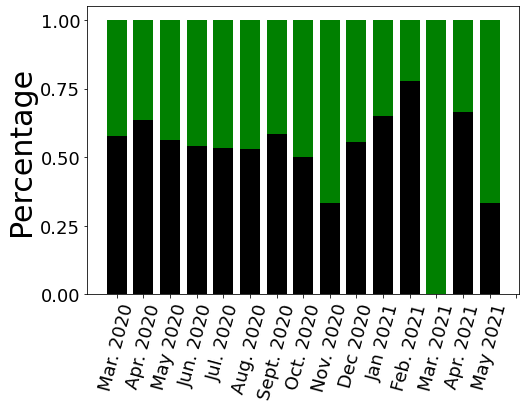

true_politifact_title :


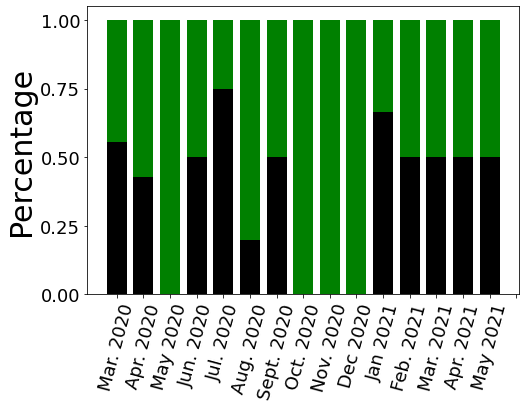

Mixed_politifact :


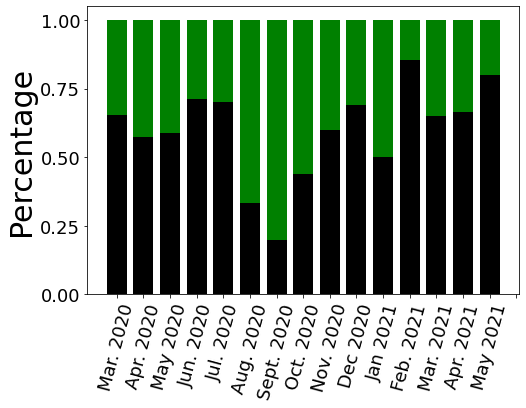

Mixed_politifact_title :


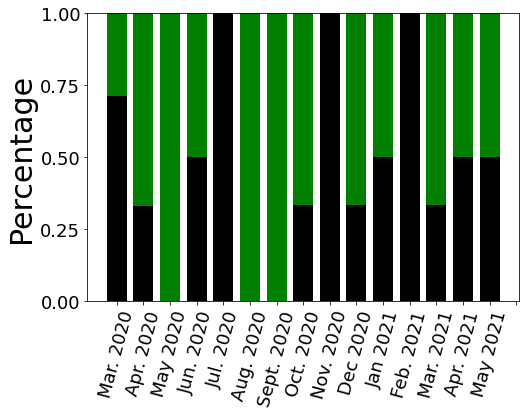

false_politifact :


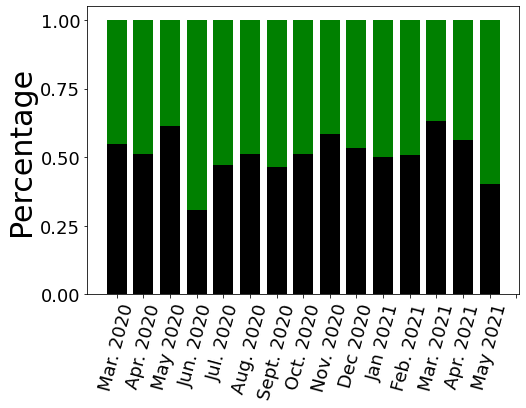

false_politifact_title :


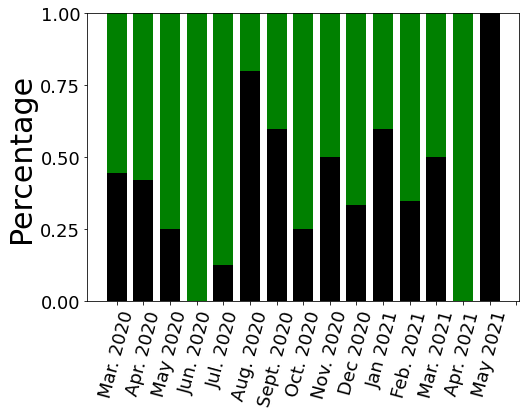

true_Snopos :


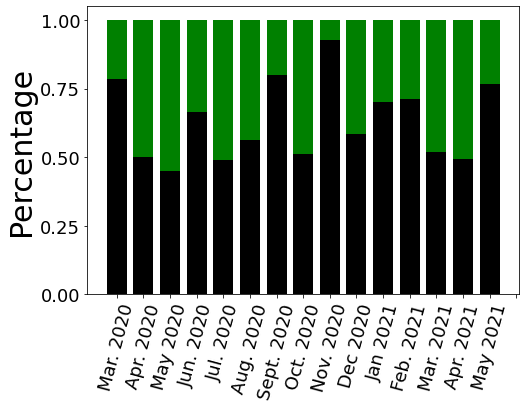

true_Snopos_title :


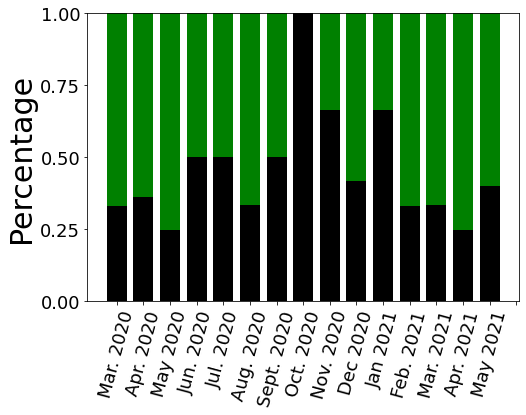

Mixed_Snopos :


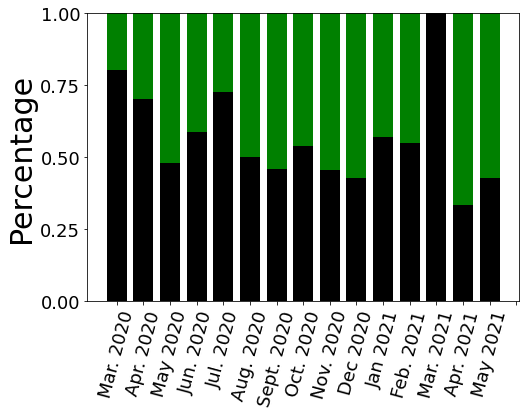

Mixed_Snopos_title :


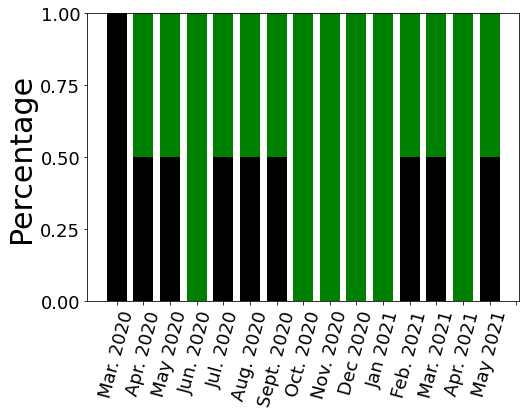

false_Snopos :


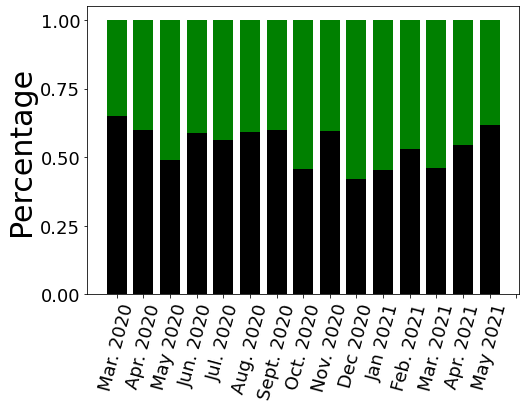

false_Snopos_title :


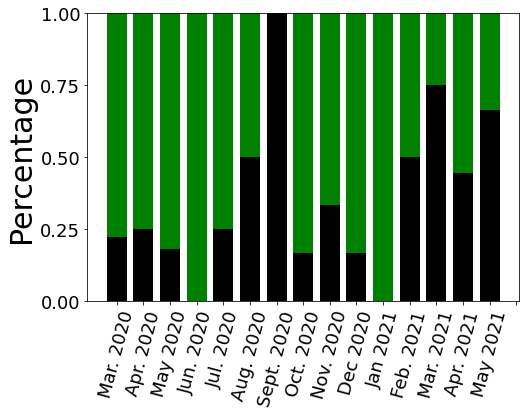

Poynter_news :


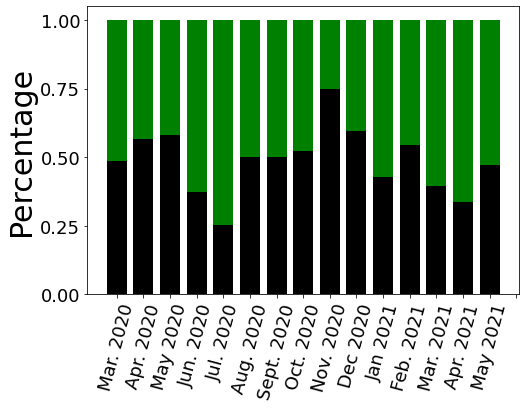

Poynter_news_title :


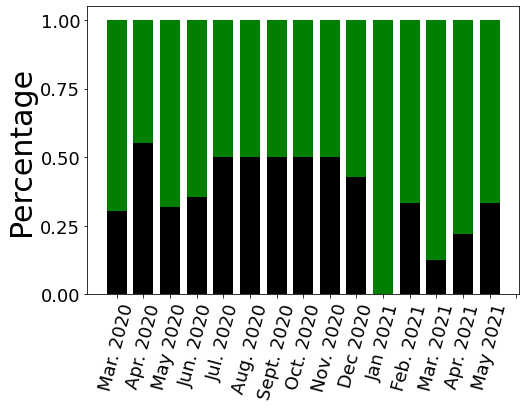

factcheck :


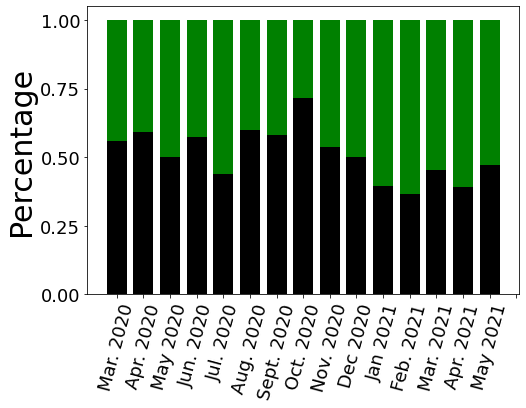

factcheck_title :


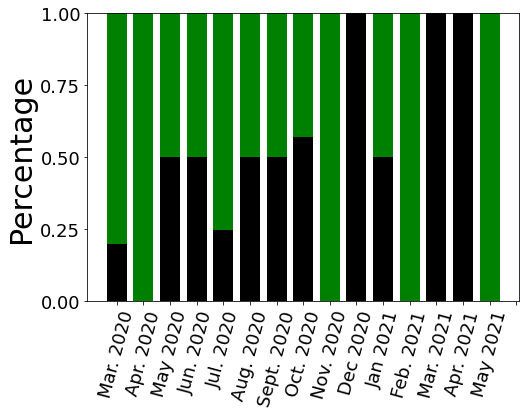

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def bar_plot(X,Y):
   n=len(X)
   ind = np.arange(n) # the x locations for the groups
   width = 0.75
   fig = plt.figure()
   ax = fig.add_axes([0,0,1,1])
   ax.bar(ind, X, width, color='k')
   ax.bar(ind, Y, width,bottom=X, color='g')
   ax.set_ylabel('Percentage', fontsize=30)
   #ax.set_xlabel("Month", fontsize=20 ) 
   #ax.set_title('Scores by group and gender')
   #ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
   #ax.set_yticks(np.arange(0, 1.1, 0.1),,fontsize=18)
   #ax.legend(labels=['Positve', 'Negative'])    
   #plt.legend(loc='best')       
   plt.xticks(np.arange(16), ['Mar. 2020','Apr. 2020','May 2020','Jun. 2020','Jul. 2020','Aug. 2020','Sept. 2020','Oct. 2020', 'Nov. 2020','Dec 2020','Jan 2021','Feb. 2021','Mar. 2021','Apr. 2021','May 2021'],rotation=75, fontsize=18)
   plt.yticks(np.arange(0, 1.1, 0.25),fontsize=18)
   plt.show()


Data_text=[true_politifact,Mixed_politifact,false_politifact,true_Snopos,Mixed_Snopos,false_Snopos,Poynter_news,factcheck[:-1]]
Data_text_lable=['true_politifact','Mixed_politifact','false_politifact','true_Snopos','Mixed_Snopos','false_Snopos','Poynter_news','factcheck']

Data_table=[true_politifact_title,Mixed_politifact_title,false_politifact_title,true_Snopos_title,Mixed_Snopos_title,false_Snopos_title,Poynter_news_title,factcheck_title[:-1]]
Data_table_lable=['true_politifact_title','Mixed_politifact_title','false_politifact_title','true_Snopos_title','Mixed_Snopos_title','false_Snopos_title','Poynter_news_title','factcheck_title']


for i in range(len(Data_text)): 
       X=Data_text[i][2:-1]
       Y=Data_table[i][2:-1]
       #for j in range(X.shape[0]):   
       #  if type(X['text_cleaned'][j]) != str: 
       #      X= X.drop(labels=j, axis=0)  
       #      Y= Y.drop(labels=j, axis=0) 
               
       print(Data_text_lable[i],':')
       P=(X['posemo']+0.00000001)  /  (X['posemo']+X['negemo']+0.00000002 )
       N=(X['negemo']+0.00000001)  /   (X['posemo']+X['negemo']+0.00000002)
       bar_plot(P,N)  

       print(Data_table_lable[i],':')
       P1=(Y['posemo']+0.00000001 )/   (Y['posemo']+Y['negemo']+0.00000002 )
       N1=(Y['negemo']+0.00000001 )/   (Y['posemo']+Y['negemo']+0.00000002 ) 
       bar_plot(P1,N1)


#All News Analysis

In [ ]:
####################################################################### LIWC on Text     ###################################################################################
true_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (true_news_all).xlsx')
Mixed_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (mixed_news_all).xlsx')
false_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (fake_news_all).xlsx')
All_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (All_news_all).xlsx')

true_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (true_news_all)_title.xlsx')
Mixed_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (mixed_news_all)_title.xlsx')
false_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (fake_news_all)_title.xlsx')
All_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (All_news_all)_title.xlsx')

In [ ]:
Data_text=[true_all,Mixed_all,false_all,All_all]
Data_text_lable=['true_all','Mixed_all','false_all','All_all']

Data_table=[true_all_title,Mixed_all_title,false_all_title,All_all_title]
Data_table_lable=['true_all_title','Mixed_all_title','false_all_title','All_all_title']
for i in range(len(Data_text)):
   print(Data_text_lable[i],':')
   fun_wordcloud(Data_text[i]['text_cleaned'])
   print(Data_table_lable[i],':')
   fun_wordcloud(Data_table[i]['text_title'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Data_ngram=[Data_text[0]['subject'],Data_text[1]['subject'],Data_text[2]['subject'],Data_text[3]['subject']]
Data_ngram_lable=['true_all: subject','Mixed_all: subject','false_all: subject','All_all: subject']

for i in range(len(Data_ngram)):
   print(Data_ngram_lable[i],':')
   X=Data_ngram[i]        
   ngrams=count_ngrams(X, min_length=1, max_length=2)
   print_most_frequent(ngrams, num=10)

true_all: subject :
----- 10 most common 1-grams -----
politics: 87
medical: 29
fauxtography: 17
entertainment: 13
business: 12
viral: 5
phenomena: 5
crime: 5
history: 5
health: 5

----- 10 most common 2-grams -----
politics politics: 39
politics medical: 11
medical politics: 11
politics fauxtography: 8
fauxtography politics: 8
business politics: 6
medical medical: 6
politics business: 5
viral phenomena: 5
politics crime: 4

Mixed_all: subject :
----- 10 most common 1-grams -----
coronavirus: 67
politics: 48
health: 32
facebook: 29
public: 19
medical: 17
fact: 16
checks: 16
posts: 10
budget: 8

----- 10 most common 2-grams -----
politics politics: 19
fact checks: 16
public health: 16
coronavirus facebook: 16
checks coronavirus: 14
facebook fact: 13
health coronavirus: 9
facebook posts: 9
wisconsin coronavirus: 8
carolina coronavirus: 7

false_all: subject :
----- 10 most common 1-grams -----
politics: 97
medical: 39
fauxtography: 13
entertainment: 9
junk: 9
news: 9
viral: 7
phenomena: 

true_all :


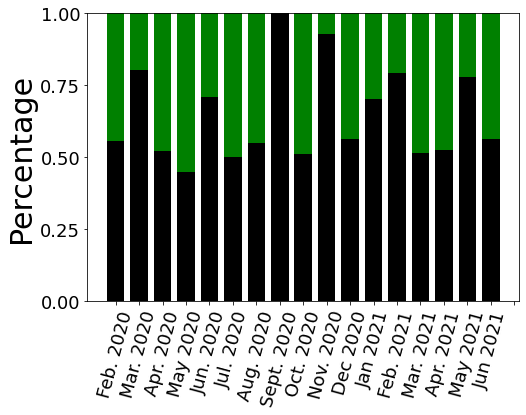

true_all_title :


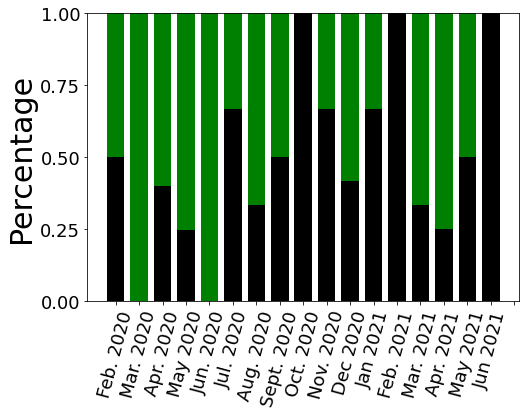

Mixed_all :


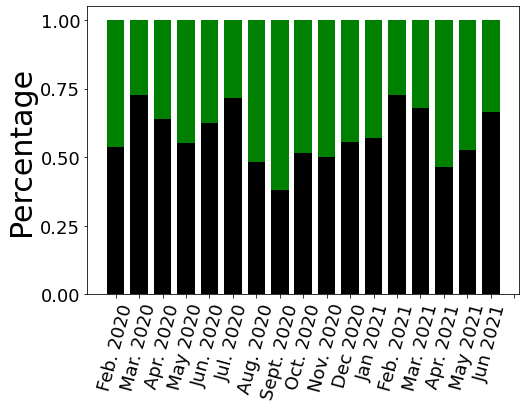

Mixed_all_title :


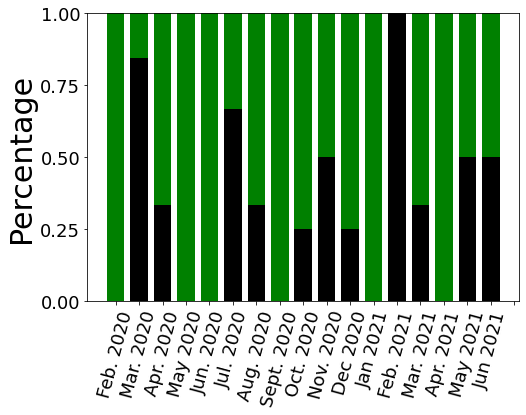

false_all :


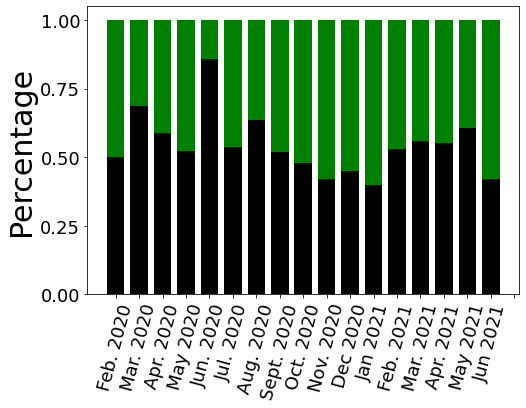

false_all_title :


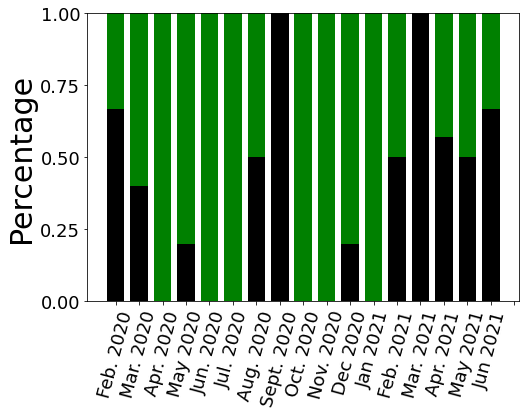

All_all :


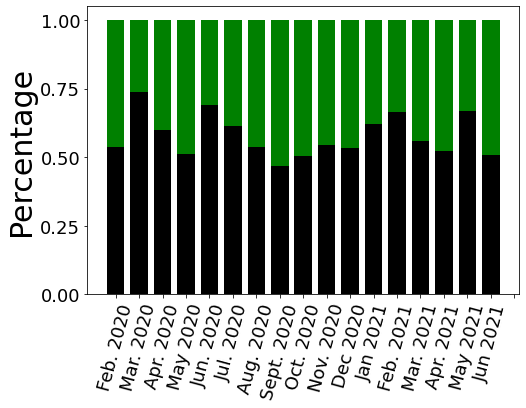

All_all_title :


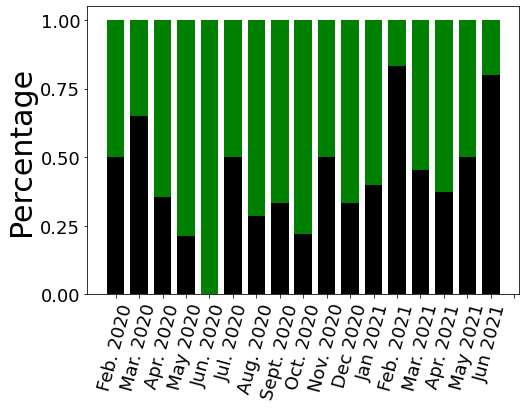

In [ ]:
def bar_plot(X,Y):
   n=len(X)
   ind = np.arange(n) # the x locations for the groups
   width = 0.75
   fig = plt.figure()
   ax = fig.add_axes([0,0,1,1])
   ax.bar(ind, X, width, color='k')
   ax.bar(ind, Y, width,bottom=X, color='g')
   ax.set_ylabel('Percentage', fontsize=30)
   #ax.set_xlabel("Month", fontsize=20 ) 
   #ax.set_title('Scores by group and gender')
   #ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
   #ax.set_yticks(np.arange(0, 1.1, 0.1),,fontsize=18)
   #ax.legend(labels=['Positve', 'Negative'])    
   #plt.legend(loc='best')       
   plt.xticks(np.arange(18), ['Feb. 2020','Mar. 2020','Apr. 2020','May 2020','Jun. 2020','Jul. 2020','Aug. 2020','Sept. 2020','Oct. 2020', 'Nov. 2020','Dec 2020','Jan 2021','Feb. 2021','Mar. 2021','Apr. 2021','May 2021','Jun 2021'],rotation=75, fontsize=18)
   plt.yticks(np.arange(0, 1.1, 0.25),fontsize=18)
   plt.show()

for i in range(len(Data_text)): 
       X=Data_text[i]
       Y=Data_table[i]
       #for j in range(X.shape[0]):   
       #  if type(X['text_cleaned'][j]) != str: 
       #      X= X.drop(labels=j, axis=0)  
       #      Y= Y.drop(labels=j, axis=0) 
               
       print(Data_text_lable[i],':')
       P=(X['posemo']+0.00000001)  /  (X['posemo']+X['negemo']+0.00000002 )
       N=(X['negemo']+0.00000001)  /   (X['posemo']+X['negemo']+0.00000002)
       bar_plot(P,N)  

       print(Data_table_lable[i],':')
       P1=(Y['posemo']+0.00000001 )/   (Y['posemo']+Y['negemo']+0.00000002 )
       N1=(Y['negemo']+0.00000001 )/   (Y['posemo']+Y['negemo']+0.00000002 ) 
       bar_plot(P1,N1)

#Tweet Analysis

In [8]:
#USA here mean all the world or english tweets
USA_general= pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/1- Tweets_allworld_jan2020-jun2021/LIWC2015 Results (all).xlsx')
USA_fake = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/1- Tweets_allworld_jan2020-jun2021/LIWC2015 Results (All_data_fake).xlsx')
USA_real = pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/1- Tweets_allworld_jan2020-jun2021/LIWC2015 Results (All_data_real).xlsx')
####################################################
USA_general=USA_general[2:]
USA_fake=USA_fake[2:]
USA_real=USA_real[2:]


####################################################################### News  ###################################################################################
true_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (true_news_all).xlsx')
Mixed_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (mixed_news_all).xlsx')
false_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (fake_news_all).xlsx')
All_all=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (All_news_all).xlsx')

true_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (true_news_all)_title.xlsx')
Mixed_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (mixed_news_all)_title.xlsx')
false_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (fake_news_all)_title.xlsx')
All_all_title=pd.read_excel('/content/drive/Shareddrives/MY Files/W IEEEmsc:resilience+fake news+Web scrapping/6- Updated news/AllNews/LIWC2015 Results (All_news_all)_title.xlsx')
Data_text=[true_all,Mixed_all,false_all,All_all]
Data_text_lable=['true_all','Mixed_all','false_all','All_all']
Data_table=[true_all_title,Mixed_all_title,false_all_title,All_all_title]
Data_table_lable=['true_all_title','Mixed_all_title','false_all_title','All_all_title']


https://ourworldindata.org/covid-deaths

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))


def frequency(DD):
    return DD['frequency']
#################################   Wellbeing  ####################################
def Mental_health_f(Data): 
   scaler = MinMaxScaler(feature_range=(0, 1))  
   Mental_health= ((Data['anx']+Data['sad']+Data['anger'])/(Data['WC'] ))
   Mental_health=np.array(Mental_health)
   scaler.fit(Mental_health.reshape(-1, 1))
   Mental_health = scaler.transform(Mental_health.reshape(-1, 1))
   Mental_health=1-Mental_health
   return Mental_health

def Physical_health_f(Data):
     Physical_health= ((-Data['i']+Data['health']+Data['leisure']+ Data['work']+Data['body']+Data['motion']      )/(Data['WC']))
     Physical_health=np.array(Physical_health)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Physical_health.reshape(-1, 1))
     Physical_health = scaler.transform(Physical_health.reshape(-1, 1))
     return Physical_health


################   Social wellbeing
def Social_well_being_social_netwrok_f(Data):
     Social_well_being_social_netwrok=(+Data['social']+Data['friend']+Data['relig'])/(Data['WC'])
     Social_well_being_social_netwrok=np.array(Social_well_being_social_netwrok)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_social_netwrok.reshape(-1, 1))
     Social_well_being_social_netwrok = scaler.transform(Social_well_being_social_netwrok.reshape(-1, 1))
     return Social_well_being_social_netwrok

def Social_well_being_family_netwrok_f(Data):
     Social_well_being_family_netwrok=(Data['family'])/(Data['WC'])
     Social_well_being_family_netwrok=np.array(Social_well_being_family_netwrok)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_family_netwrok.reshape(-1, 1))
     Social_well_being_family_netwrok = scaler.transform(Social_well_being_family_netwrok.reshape(-1, 1))
     return Social_well_being_family_netwrok

def Social_well_being_work_netwrok_f(Data):
     Social_well_being_work=(Data['money']+Data['achieve']+Data['reward'])/(Data['WC'])
     Social_well_being_work=np.array(Social_well_being_work)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_being_work.reshape(-1, 1))
     Social_well_being_work = scaler.transform(Social_well_being_work.reshape(-1, 1))
     return Social_well_being_work

def Social_well_being_f(Data):
     Social_well_bein=(+Data['social']+Data['friend']+Data['relig']+Data['family']+Data['money']+Data['achieve']+Data['reward'])/(Data['WC'])
     Social_well_bein=np.array(Social_well_bein)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Social_well_bein.reshape(-1, 1))
     Social_well_bein = scaler.transform(Social_well_bein.reshape(-1, 1))
     return Social_well_bein
#######################################     

def wellbeing(Data):
   CR2=(Physical_health_f(Data)+Mental_health_f(Data) )/2
   return CR2
###################################### Coomunty capital
def Cooperation_f(Data):
     #Cooperation=(Data['WC']-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Cooperation=(-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Cooperation=Cooperation
     Cooperation=np.array(Cooperation)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Cooperation.reshape(-1, 1))
     Cooperation = scaler.transform(Cooperation.reshape(-1, 1))
     return Cooperation

############################################## Economic
def Economic_f(Data):
     #Economic=(Data['posemo']/(Data['WC']))*(Data['money']+Data['work'])/(Data['WC'])
     Economic=  ((Data['posemo']-Data['negemo'])/Data['WC']) *((Data['money']+Data['work'])/ Data['WC'] )
     Economic=np.array(Economic)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Economic.reshape(-1, 1))
     Economic = scaler.transform(Economic.reshape(-1, 1))
     return Economic


############################################## Instutional
def Instutional_f(Data):
     #Cooperation=(Data['WC']-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     #Instutional=(Data['work']+Data['achieve']+Data['reward']+Data['assent'])/(Data['WC'])
     Instutional=  ((Data['posemo']-Data['negemo'])/Data['WC'])   *(Data['achieve']+Data['reward']+Data['assent'])/(Data['WC'])
     Instutional=np.array(Instutional)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Instutional.reshape(-1, 1))
     Instutional = scaler.transform(Instutional.reshape(-1, 1))
     return Instutional

#(Data['posemo']-Data['negemo'])
############################################## Infrustructure
def Infrustructure_f(Data):
     #Cooperation=(Data['WC']-Data['Sixltr']+Data['we']+Data['social']+Data['family']+Data['friend']+Data['assent'])/(Data['WC'])
     Infrustructure=((Data['posemo']-Data['negemo'])/Data['WC'])*(Data['motion']+Data['health'] )/(Data['WC'])
     Infrustructure=np.array(Infrustructure)
     scaler = MinMaxScaler(feature_range=(0, 1))
     scaler.fit(Infrustructure.reshape(-1, 1))
     Infrustructure = scaler.transform(Infrustructure.reshape(-1, 1))
     return Infrustructure
################################################ Community resilinec


def CR_wellbeing(Data):
   RD=(Cooperation_f(Data)+Economic_f(Data)+Instutional_f(Data)+Infrustructure_f(Data) )  /4
   CR2=(wellbeing(Data)+ RD )/2
   return CR2





Color:  https://matplotlib.org/stable/gallery/color/named_colors.html

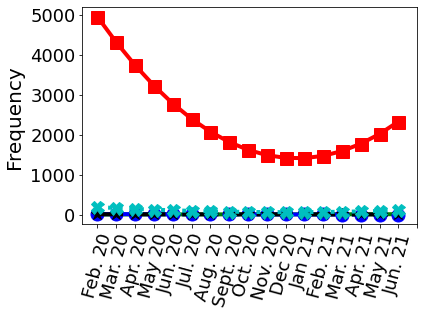

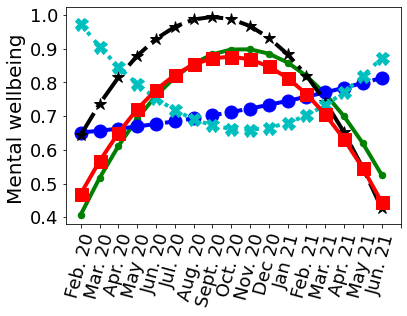

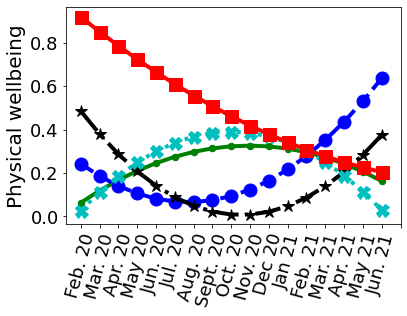

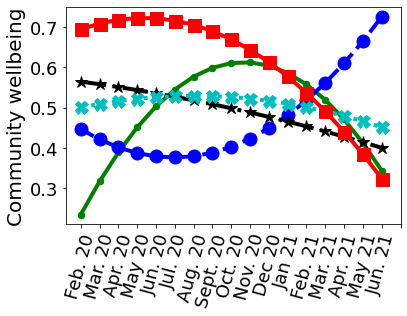

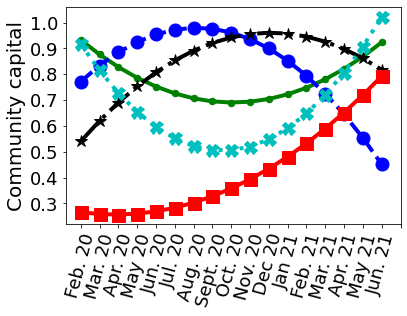

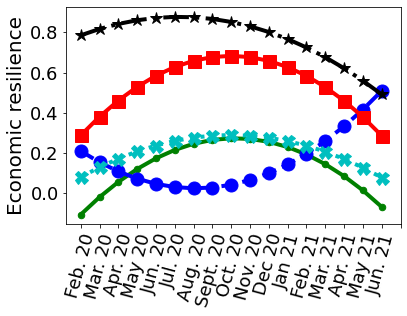

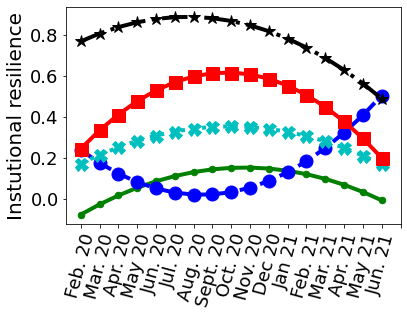

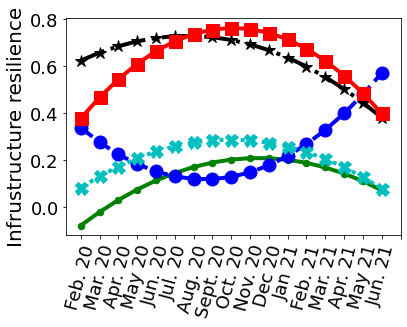

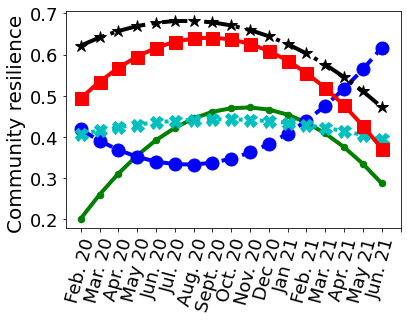

In [10]:
#Data=[true_all,Mixed_all,false_all,All_all,USA_general,USA_fake,USA_real]
#Data=[true_all_title,Mixed_all_title,false_all_title,All_all_title,USA_general,USA_fake,USA_real]
#Data_name=['True news','Mixed news','Fake news','All news','All tweets','Fake tweets','Real tweets']
#Curve=['g.-','bo--','k*-.','c+:','rs-','m|-','slategrey']
#lable=['True','Mixed','Fake','All','All','Fake','True']


Data=[true_all,Mixed_all,false_all,USA_real,USA_fake]
#Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
Data_name=['True news','Mixed news','Fake news','Real tweets','Fake tweets']
Curve=['g.-','bo--','k*-.','cX:','rs-']
lable=['True','Mixed','Fake','True','Fake']

def Whatplot(functions,Fitting_Cureve_function):
     for i in range(len(Curve)): 
          if i<3:  Title='Media News'  
          elif i>=3: Title='twitter'          
          
          if functions==frequency:  Ylabel='Frequency '
          elif functions==Mental_health_f :  Ylabel='Mental wellbeing '   
          elif functions==Physical_health_f:  Ylabel='Physical wellbeing'  
          elif functions==Social_well_being_f:  Ylabel='Social wellbeing'  
          elif functions==Social_well_being_social_netwrok_f:  Ylabel='Ratio of social \n'+ 'related languages'  
          elif functions==Social_well_being_family_netwrok_f:  Ylabel='Ratio of family \n' +'related languages'  
          elif functions==Social_well_being_work_netwrok_f:  Ylabel='Ratio of work \n' +'related languages' 
          elif functions==wellbeing:  Ylabel='Community wellbeing' 
          elif functions==Cooperation_f:  Ylabel='Community capital' 
          elif functions==Economic_f:  Ylabel='Economic resilience' 
          elif functions==Instutional_f:  Ylabel='Instutional resilience' 
          elif functions==Infrustructure_f:  Ylabel='Infrustructure resilience' 
          elif functions==CR_wellbeing :  Ylabel='Community resilience '  
          DD=Data[i]
          Whatplot=functions(DD)   
          xdata = range(Whatplot.shape[0])
          Whatplot=np.array(Whatplot)
          popt, pcov = curve_fit(Fitting_Cureve_function,xdata, Whatplot.flatten())
          #try:  
          plt.plot(  Fitting_Cureve_function(xdata, *popt), Curve[i], markersize=13,linewidth=4,label=Data_name[i]) 
          #except ValueError:
          #  pass
          #plt.plot(Whatplot, Curve[i], linewidth=2,label=Data_name[i]) 

     #plt.legend(loc="upper right") 
     #plt.legend(loc='best')       
     #plt.title("Covid_19 related "+Title+" Tweets", fontsize=18) 
     #plt.xlabel("Month", fontsize=20 ) 
     plt.ylabel(Ylabel, fontsize=20) 
     #plt.xticks(np.arange(9), ['March','April','May','June','July','August','September','Octobor', 'Novomber'],rotation=30)
     #plt.xticks(np.arange(9), ['Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.', 'Nov.'],rotation=30, fontsize=18)
     #plt.yticks(np.arange(0,1,0.2), fontsize=18)
     plt.yticks( fontsize=18)
     plt.xticks(np.arange(18), ['Feb. 20','Mar. 20','Apr. 20','May 20','Jun. 20','Jul. 20','Aug. 20','Sept. 20','Oct. 20', 'Nov. 20','Dec 20','Jan 21','Feb. 21','Mar. 21','Apr. 21','May 21','Jun. 21'],rotation=75, fontsize=18)
     #plt.xlim([0, 1])  
     #plt.ylim([0, 1])  
     plt.show()
     return 

#functions=[frequency,Mental_health_f,Physical_health_f,Social_well_being_f,Social_well_being_social_netwrok_f,Social_well_being_family_netwrok_f,Social_well_being_work_netwrok_f, wellbeing,Cooperation_f,Economic_f,Instutional_f,Infrustructure_f,CR_wellbeing]
functions=[frequency,Mental_health_f,Physical_health_f, wellbeing,Cooperation_f,Economic_f,Instutional_f,Infrustructure_f,CR_wellbeing]
Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]
Fitting_Cureve_function_name=['func_exp','func_Gaussian','func_Polynomial','func_Power','func_Rational','func_sine','func_Weibull']
for i in range(len(functions)):
        Whatplot(functions[i],Fitting_Cureve_function=Fitting_Cureve_function[2])

title of news 

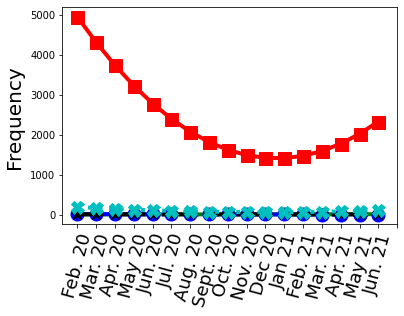

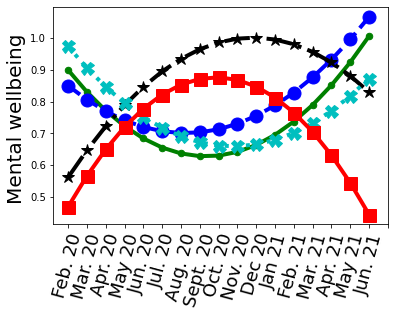

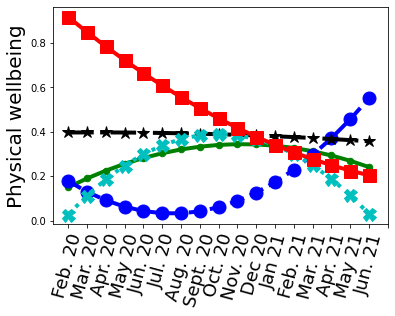

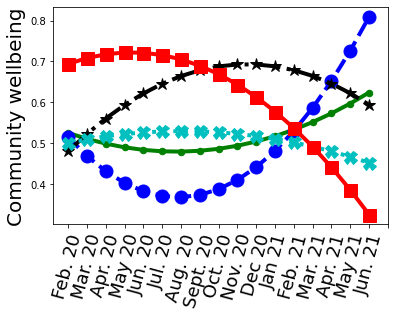

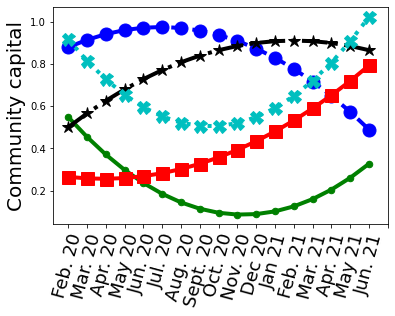

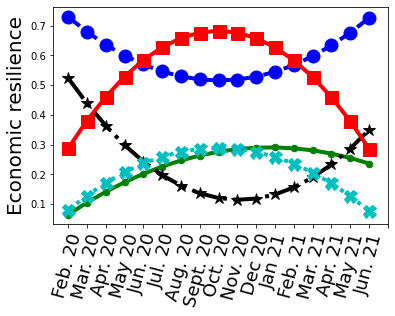

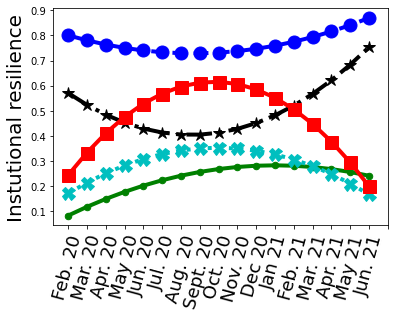

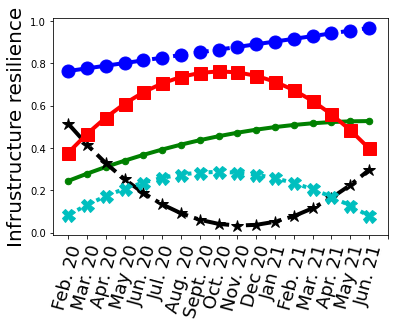

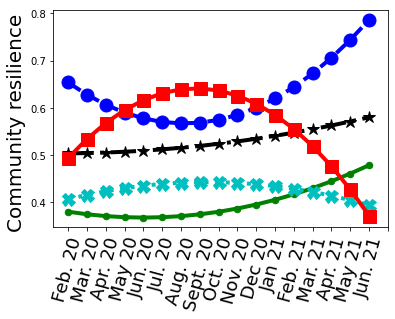

In [11]:
#Data=[true_all,Mixed_all,false_all,All_all,USA_general,USA_fake,USA_real]
#Data=[true_all_title,Mixed_all_title,false_all_title,All_all_title,USA_general,USA_fake,USA_real]
#Data_name=['True news','Mixed news','Fake news','All news','All tweets','Fake tweets','Real tweets']
#Curve=['g.-','bo--','k*-.','c+:','rs-','m|-','slategrey']
#lable=['True','Mixed','Fake','All','All','Fake','True']


#Data=[true_all,Mixed_all,false_all,USA_real,USA_fake]
Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
Data_name=['True news','Mixed news','Fake news','Real tweets','Fake tweets']
Curve=['g.-','bo--','k*-.','cX:','rs-']
lable=['True','Mixed','Fake','True','Fake']

def Whatplot(functions,Fitting_Cureve_function):
     for i in range(len(Curve)): 
          if i<3:  Title='Media News'  
          elif i>=3: Title='twitter'          
          
          if functions==frequency:  Ylabel='Frequency '
          elif functions==Mental_health_f :  Ylabel='Mental wellbeing '   
          elif functions==Physical_health_f:  Ylabel='Physical wellbeing'  
          elif functions==Social_well_being_f:  Ylabel='Social wellbeing'  
          elif functions==Social_well_being_social_netwrok_f:  Ylabel='Ratio of social \n'+ 'related languages'  
          elif functions==Social_well_being_family_netwrok_f:  Ylabel='Ratio of family \n' +'related languages'  
          elif functions==Social_well_being_work_netwrok_f:  Ylabel='Ratio of work \n' +'related languages' 
          elif functions==wellbeing:  Ylabel='Community wellbeing' 
          elif functions==Cooperation_f:  Ylabel='Community capital' 
          elif functions==Economic_f:  Ylabel='Economic resilience' 
          elif functions==Instutional_f:  Ylabel='Instutional resilience' 
          elif functions==Infrustructure_f:  Ylabel='Infrustructure resilience' 
          elif functions==CR_wellbeing :  Ylabel='Community resilience '  
          DD=Data[i]
          Whatplot=functions(DD)   
          xdata = range(Whatplot.shape[0])
          Whatplot=np.array(Whatplot)
          popt, pcov = curve_fit(Fitting_Cureve_function,xdata, Whatplot.flatten())
          #try:  
          plt.plot(  Fitting_Cureve_function(xdata, *popt), Curve[i], markersize=13,linewidth=4,label=Data_name[i]) 
          #except ValueError:
          #  pass
          #plt.plot(Whatplot, Curve[i], linewidth=2,label=Data_name[i]) 

     #plt.legend(loc="upper right") 
     #plt.legend(loc='best')       
     #plt.title("Covid_19 related "+Title+" Tweets", fontsize=18) 
     #plt.xlabel("Month", fontsize=20 ) 
     plt.ylabel(Ylabel, fontsize=20) 
     #plt.xticks(np.arange(9), ['March','April','May','June','July','August','September','Octobor', 'Novomber'],rotation=30)
     #plt.xticks(np.arange(9), ['Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.', 'Nov.'],rotation=30, fontsize=18)
     plt.xticks(np.arange(18), ['Feb. 20','Mar. 20','Apr. 20','May 20','Jun. 20','Jul. 20','Aug. 20','Sept. 20','Oct. 20', 'Nov. 20','Dec 20','Jan 21','Feb. 21','Mar. 21','Apr. 21','May 21','Jun. 21'],rotation=75, fontsize=18)
     plt.show()
     return 

#functions=[frequency,Mental_health_f,Physical_health_f,Social_well_being_f,Social_well_being_social_netwrok_f,Social_well_being_family_netwrok_f,Social_well_being_work_netwrok_f, wellbeing,Cooperation_f,Economic_f,Instutional_f,Infrustructure_f,CR_wellbeing]
functions=[frequency,Mental_health_f,Physical_health_f, wellbeing,Cooperation_f,Economic_f,Instutional_f,Infrustructure_f,CR_wellbeing]
Fitting_Cureve_function=[func_exp,func_Gaussian,func_Polynomial,func_Power,func_Rational,func_sine,func_Weibull]
Fitting_Cureve_function_name=['func_exp','func_Gaussian','func_Polynomial','func_Power','func_Rational','func_sine','func_Weibull']
for i in range(len(functions)):
        Whatplot(functions[i],Fitting_Cureve_function=Fitting_Cureve_function[2])

#Summery of Results

In [ ]:
def fit_value(DD):
    xdata = range(DD.shape[0])
    DD=np.array(DD)
    popt, pcov = curve_fit(func_Polynomial,xdata, DD.flatten())
    return  func_Polynomial(xdata, *popt)

def Ave_f(DD):
    #DD=DD[~np.isnan(DD).any(axis=1), :]
    return np.average(DD)


def Whatinfo(Ave_f):
  Result=pd.DataFrame()
  Result['Mental health']=''
  #Result['Community Resilience']=''
  Result['Physical health']=''
  #Result['Social network wellbeing']=''
  #Result['Family netwrok wellbeing']=''
  #Result['Work netwrok wellbeing']=''
  #Result['Social wellbeing']=''
  Result['Community wellbeing' ]=''
  Result['Community Capital']=''
  Result['Economic resilience']=''
  Result['Instutional resilience']=''
  Result['Infrustucture resilience']=''
  Result['Community Resilience']=''



  number_countries=5
  Data=[true_all,Mixed_all,false_all,USA_real,USA_fake] 
  #Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
  Data_name=['True news','Mixed news','Fake news','Real tweets','Fake tweets']

  for i in range(5):
        DD=Data[i]
        Result.at[Data_name[i],'Mental health']=Ave_f(fit_value(Mental_health_f(DD)))
        #Result.at[Data_name[i],'Community Resilience']=Ave_f(CR_f(DD,DData_SEANCE))
        Result.at[Data_name[i],'Physical health']=Ave_f(fit_value(Physical_health_f(DD)))
        #Result.at[Data_name[i],'Social wellbeing']=Ave_f(fit_value(Social_well_being_f(DD)))
        #Result.at[Data_name[i],'Social network wellbeing']=Ave_f(fit_value(Social_well_being_social_netwrok_f(DD)))
        #Result.at[Data_name[i],'Family netwrok wellbeing']=Ave_f(fit_value(Social_well_being_family_netwrok_f(DD)))
        #Result.at[Data_name[i],'Work netwrok wellbeing']=Ave_f(fit_value(Social_well_being_work_netwrok_f(DD)))
        Result.at[Data_name[i],'Community wellbeing']=Ave_f(fit_value(wellbeing(DD)))
        Result.at[Data_name[i],'Community Capital']=Ave_f(fit_value(Cooperation_f(DD)))
        Result.at[Data_name[i],'Economic resilience']=Ave_f(fit_value(Economic_f(DD)))
        Result.at[Data_name[i],'Instutional resilience']=Ave_f(fit_value(Instutional_f(DD)))
        Result.at[Data_name[i],'Infrustucture resilience']=Ave_f(fit_value(Infrustructure_f(DD)))
        Result.at[Data_name[i],'Community Resilience']=Ave_f(fit_value(CR_wellbeing(DD)))

  return Result.head(6)

Whatinfo(Ave_f)

,Mental health,Physical health,Community wellbeing,Community Capital,Economic resilience,Instutional resilience,Infrustucture resilience,Community Resilience
True news,0.736161,0.244296,0.490228,0.779559,0.137809,0.0771974,0.125382,0.385108
Mixed news,0.719775,0.223432,0.471603,0.83016,0.16082,0.158118,0.250717,0.410778
Fake news,0.81832,0.166896,0.492608,0.843413,0.771447,0.777361,0.632475,0.624391
Real tweets,0.759982,0.254841,0.507412,0.679692,0.210149,0.28335,0.210202,0.42663
Fake tweets,0.719477,0.498615,0.609046,0.422066,0.534423,0.467396,0.62176,0.560229


Plt colors:

https://matplotlib.org/stable/gallery/color/named_colors.html

Markers:

https://matplotlib.org/stable/api/markers_api.html

In [ ]:
summary=Whatinfo(Ave_f).drop(['Mental health','Physical health'],axis=1).T
summary

,True news,Mixed news,Fake news,Real tweets,Fake tweets
Community wellbeing,0.490228,0.471603,0.492608,0.507412,0.609046
Community Capital,0.779559,0.83016,0.843413,0.679692,0.422066
Economic resilience,0.137809,0.16082,0.771447,0.210149,0.534423
Instutional resilience,0.0771974,0.158118,0.777361,0.28335,0.467396
Infrustucture resilience,0.125382,0.250717,0.632475,0.210202,0.62176
Community Resilience,0.385108,0.410778,0.624391,0.42663,0.560229


([<matplotlib.axis.XTick at 0x7fc59ad92250>,
 [Text(0, 0, '             Community\n            wellbeing'),
  Text(0, 0, '             Community\n            capital'),
  Text(0, 0, '             Economic \n            resilience'),
  Text(0, 0, '             Instutional \n            resilience'),
  Text(0, 0, '             Infrustucture \n            resilience'),
  Text(0, 0, '             Community\n            resilience')])

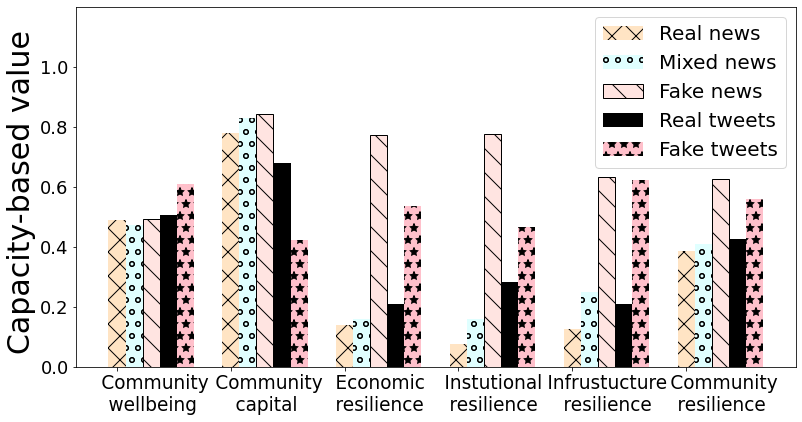

In [ ]:
summary=Whatinfo(Ave_f).drop(['Mental health','Physical health'],axis=1).T
#Real_summary=summary.drop(['Australia_fake','Singapore_fake','SouthKorea_fake','UK_fake','USA_fake'],axis=0).T
#fake_summary=summary.drop(['Australia_real','Singapore_real','SouthKorea_real','UK_real','USA_real'],axis=0).T

X = np.arange(6)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, summary['True news'], color = 'bisque', hatch = 'x',width = 0.15)
ax.bar(X + 0.15, summary['Mixed news'], color = 'lightcyan',hatch = 'o', width = 0.15)
ax.bar(X + 0.3, summary['Fake news'], color = 'mistyrose', edgecolor='k',hatch = '\\', width = 0.15)
ax.bar(X + 0.45,   summary['Real tweets'],  color = 'black',hatch = '*', width = 0.15)
ax.bar(X + 0.6,    summary['Fake tweets'],   color = 'pink',hatch = '*', width = 0.15)

#ax.legend(labels=['AUS-real','SG-real','ROK-real','UK-real','US-real'],loc="best", fontsize=18)
#ax.legend(bbox_to_anchor=(-.01, .922, 4., 0.1),loc='upper right', prop={'size': 15},labels=['True news','Mixed news','Fake news','Real tweets','Fake tweets'])   
ax.legend(loc='upper right', prop={'size': 20},labels=['Real news','Mixed news','Fake news','Real tweets','Fake tweets'])   

ax.set_ylim(0,1.2)
plt.ylabel('Capacity-based value ', fontsize=30) 
plt.yticks(np.arange(0,1.1,0.2), fontsize=18)
plt.xticks(np.arange(6), ['             Community\n            wellbeing','             Community\n            capital','             Economic \n            resilience','             Instutional \n            resilience','             Infrustucture \n            resilience','             Community\n            resilience'],rotation=0, fontsize=18.5)
#plt.yticks(fontsize=18)



In [ ]:
Result=Whatinfo(Ave_f)
Result.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

0 0
(MH) 


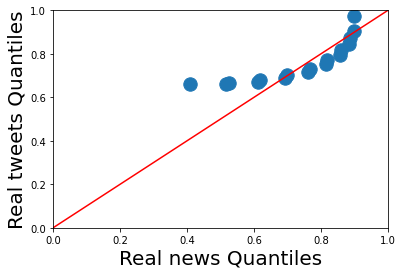

(MH) 


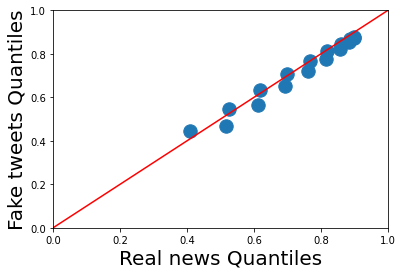

0 1
(MH) 


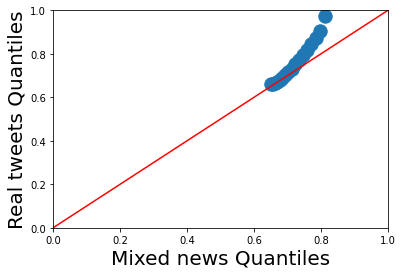

(MH) 


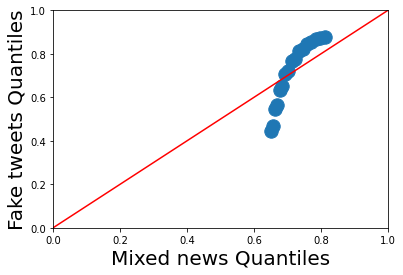

0 2
(MH) 


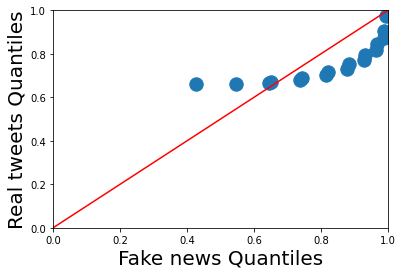

(MH) 


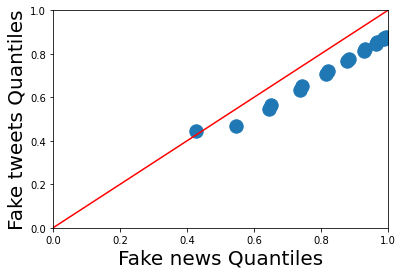

1 0
(PH) 


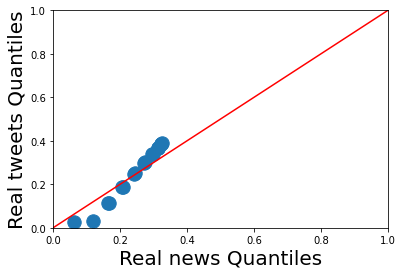

(PH) 


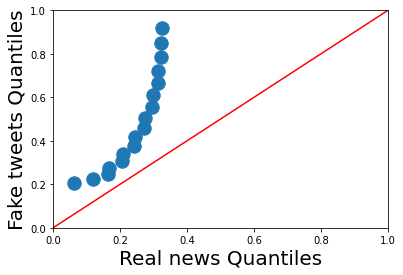

1 1
(PH) 


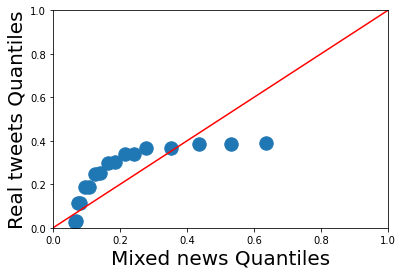

(PH) 


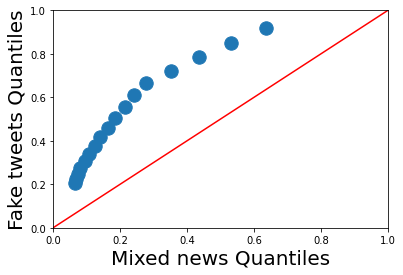

1 2
(PH) 


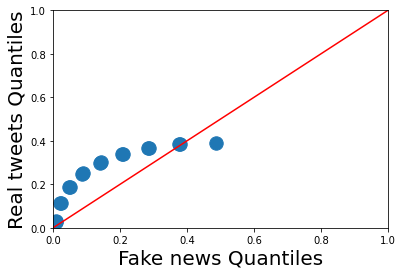

(PH) 


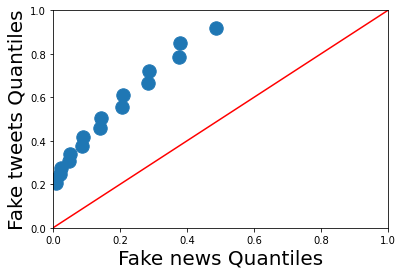

2 0
(Well) 


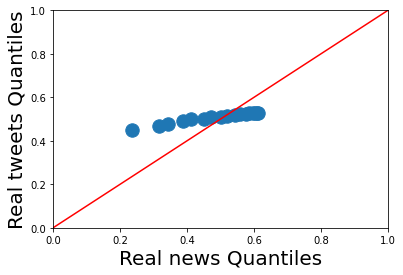

(Well) 


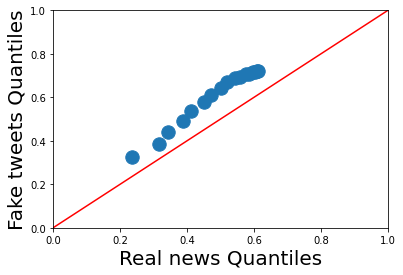

2 1
(Well) 


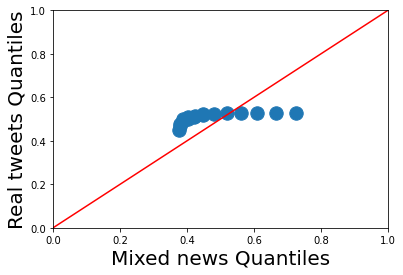

(Well) 


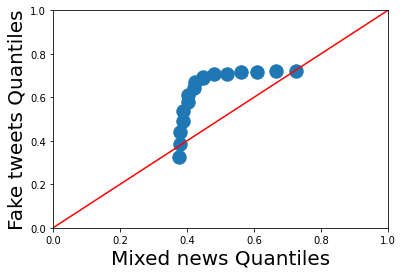

2 2
(Well) 


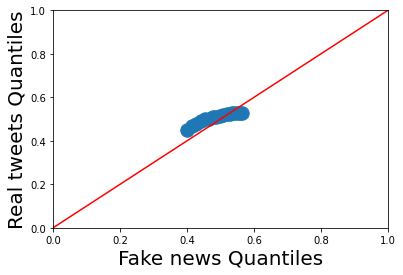

(Well) 


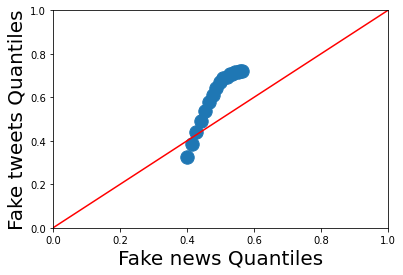

3 0
(Cope) 


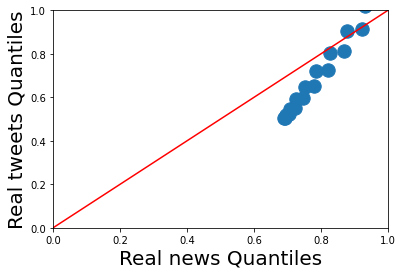

(Cope) 


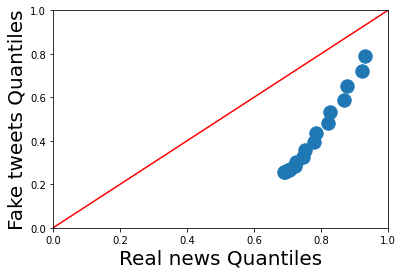

3 1
(Cope) 


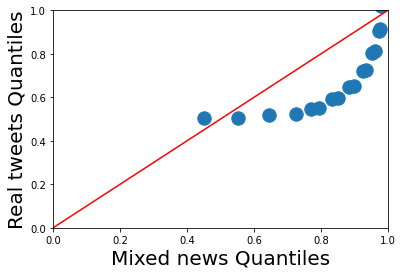

(Cope) 


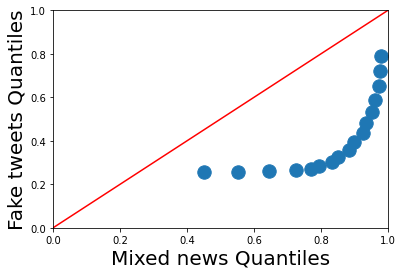

3 2
(Cope) 


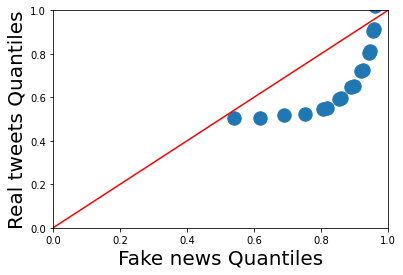

(Cope) 


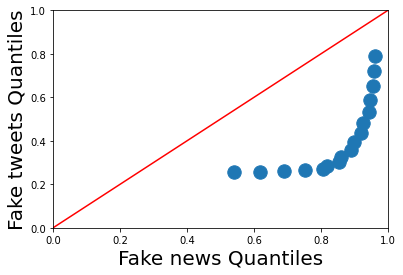

4 0
(Econ) 


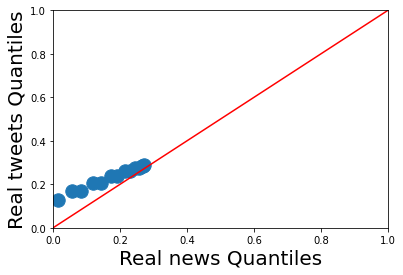

(Econ) 


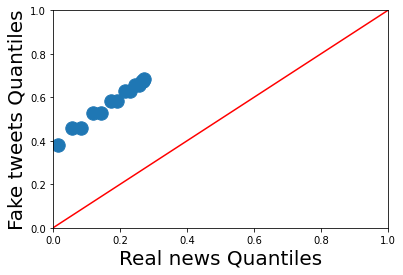

4 1
(Econ) 


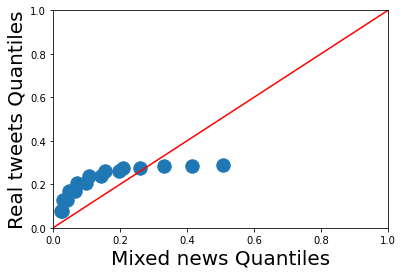

(Econ) 


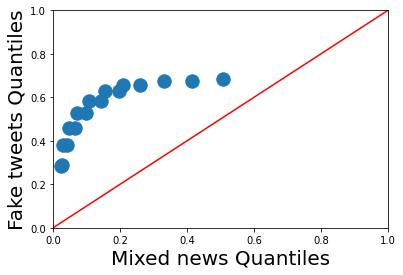

4 2
(Econ) 


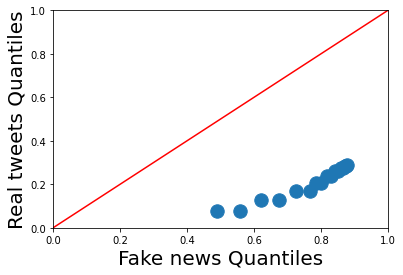

(Econ) 


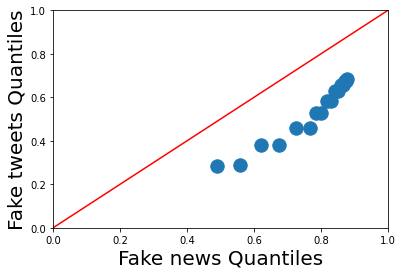

5 0
(Inst) 


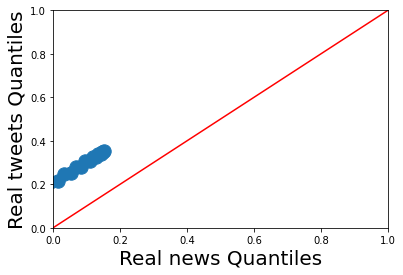

(Inst) 


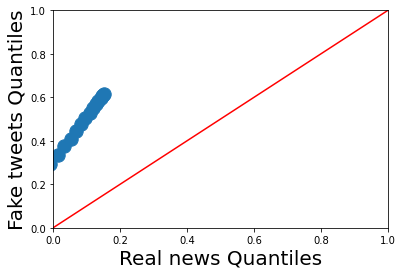

5 1
(Inst) 


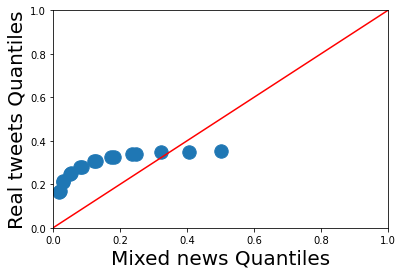

(Inst) 


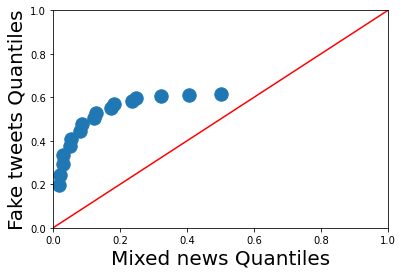

5 2
(Inst) 


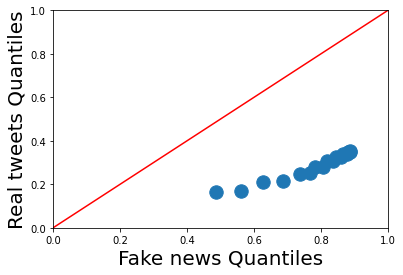

(Inst) 


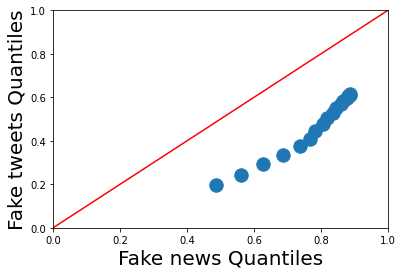

6 0
(Infr) 


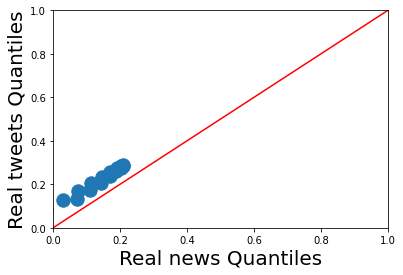

(Infr) 


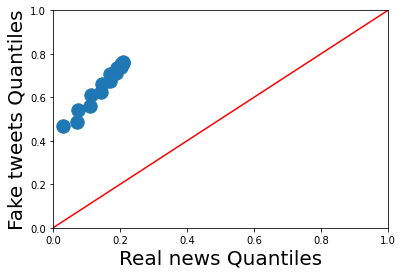

6 1
(Infr) 


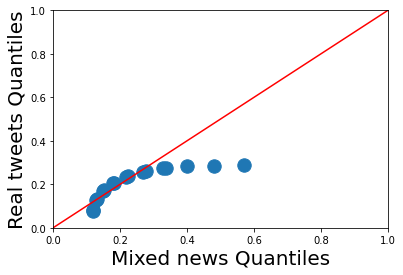

(Infr) 


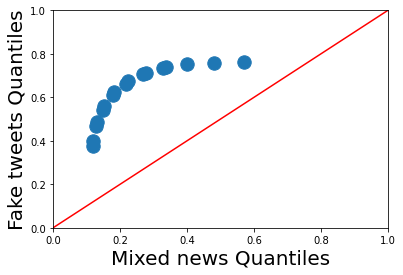

6 2
(Infr) 


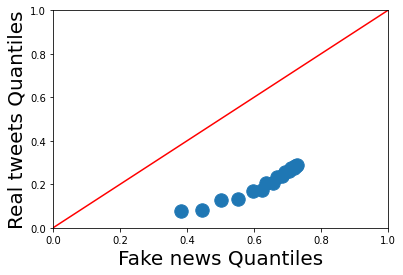

(Infr) 


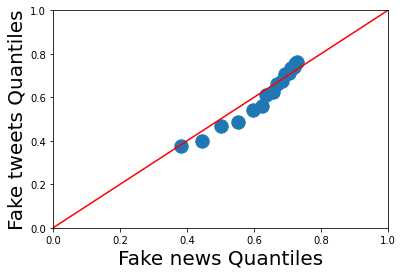

7 0
(CR) 


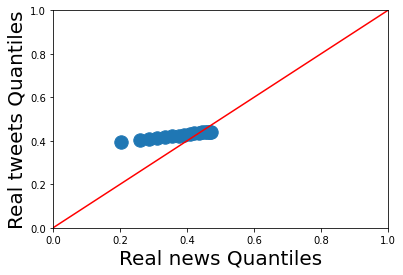

(CR) 


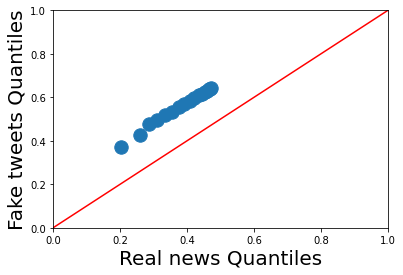

7 1
(CR) 


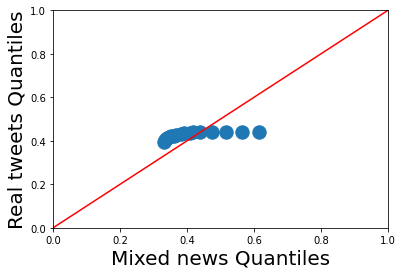

(CR) 


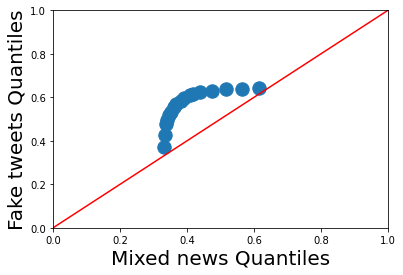

7 2
(CR) 


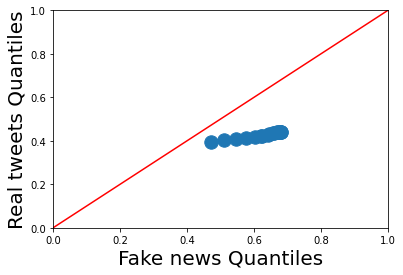

(CR) 


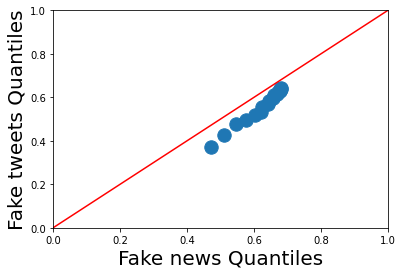

,Real tweets(pearsonr),Fake tweets(pearsonr),Real tweets(kendalltau),Fake tweets(kendalltau),Real tweets(Par),Fake tweets(Par),Real tweets(Non.),Fake tweets(Non.)
(MH) T,-0.995553,0.95549,-1,0.764706,Yes,Yes,Yes,Yes
(MH) M,-0.203344,-0.187923,-0.176471,-0.0588235,Yes,Yes,Yes,Yes
(MH) F,-0.728269,0.935479,-0.647059,0.882353,Yes,Yes,Yes,No
(PH) T,0.918247,-0.535977,0.882353,-0.176471,Yes,No,Yes,No
(PH) M,-0.686124,-0.610072,-0.470588,-0.470588,Yes,No,Yes,No
(PH) F,-0.973959,0.377606,-0.882353,0.176471,Yes,No,No,No
(Well) T,0.512851,0.137165,0.441176,0,Yes,No,Yes,No
(Well) M,-0.976066,-0.983542,-0.75,-0.808824,Yes,No,No,No
(Well) F,0.741727,0.944656,0.382353,0.823529,Yes,No,Yes,No
(Cope) T,0.97088,0.29969,0.882353,0,No,No,No,No


In [ ]:
##########################################   Normality Test    #################################################
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
#data = np.array(Harvey_dt_adult_d['anger'])
#[0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
def normality_test(data):
   stat, p = shapiro(data)
   #print('stat=%.3f, p=%.3f' % (stat, p))
   if p > 0.05:
	   explain='Probably Gaussian'
   else:
	   explain='Probably not Gaussian'
   return p,explain


##########################################   correlation    #####################################################
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import (kendalltau,rankdata)
from scipy.stats import chi2_contingency   #the Chi-Squared Test




def Corr_summ(X,Y):
  X=np.array(X)
  Y=np.array(Y)
  A=np.zeros([len(X)])
  B=np.zeros([len(Y)])
  for i in range(len(A)): 
      A[i]=X[i]
      B[i]=Y[i]
  corr1,p1 = pearsonr(A,B)           #p<0.05 : dependent
  corr2,p2 = spearmanr(A,B)
  corr3=np.dot (A, B)/(np.linalg.norm (A) * np.linalg.norm (B))
  corr4,p4=kendalltau(A,B)
  #corr5, p5, dof, expected = chi2_contingency(A,B)
  if p1 > 0.05:
	      explain1='Ind.'
  else:
	      explain1='Dep.'
  return corr1,p1,explain1,corr2,p2,corr3,corr4,p4





#############################   Parametric Statistical Hypothesis Tests  ##########################################
from scipy.stats import ttest_ind   # Example of the Student's t-test
from scipy.stats import ttest_rel   # Example of the Paired Student's t-test
from scipy.stats import f_oneway # Example of the Analysis of Variance Test

#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

def para_hypothesis(data1,data2):
     stat1, p1 = ttest_ind(data1, data2)
     stat2, p2 = ttest_rel(data1, data2)
     stat3, p3 = f_oneway(data1, data2)
     #print('stat=%.3f, p=%.3f' % (stat, p))
     if p1 > 0.05:
	         explain1='Yes'
     else:
	         explain1='No'
     return  stat1, p1,explain1 


#############################   Nonparametric Statistical Hypothesis Tests  ########################################
from scipy.stats import mannwhitneyu # Example of the Mann-Whitney U Test
from scipy.stats import wilcoxon # Example of the Wilcoxon Signed-Rank Test
from scipy.stats import kruskal # Example of the Kruskal-Wallis H Test
from scipy.stats import friedmanchisquare # Example of the Friedman Test
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
def Non_para_hypothesis(data1,data2):
      stat1, p1 = mannwhitneyu(data1, data2)
      #stat2, p2 = wilcoxon(data1, data2)
      stat3, p3 = kruskal(data1, data2)
      #stat4, p4 = friedmanchisquare(data1, data2, data3)
      #print('stat=%.3f, p=%.3f' % (stat, p))
      if p1 > 0.05:
	         explain1='Yes'
      else:
	         explain1='No'
      return  stat1, p1,explain1 
################################################# Quantile-quantile plot   ############################################################
def QQ_plot(X,Y,x_n,y_n,lablee):
   XX=np.linspace(0,1,1000)
   plt.plot(XX,XX,'r')
   plt.scatter(np.sort(X), np.sort(Y), s=180)
   #plt.scatter(np.sort(X), np.sort(Y), s=400,c='lightblue')
   plt.xlabel(x_n+' Quantiles', fontsize=20)
   plt.ylabel(y_n+' Quantiles', fontsize=20)
   #plt.title(' '+lablee+'\n Feb. 20- Jun. 21\n Covid_19', loc='left',y=0.75,fontsize = 15, style='italic')
   plt.xlim([0, 1])
   plt.ylim([0, 1])
   plt.show()


def Satat_analysis(X,Y,X_n,Y_n,lablee):
   p_a,explain_a=normality_test(X)
   p_b,explain_b=normality_test(Y)
   corr1,p1,explain1,corr2,p2,corr3,corr4,p4=Corr_summ(X,Y)

   stat_e, p_e,explain_e =para_hypothesis(X,Y)
   stat_f, p_f,explain_f =Non_para_hypothesis(X,Y)
   QQ_plot(X,Y,X_n,Y_n,lablee)
   return p_a,explain_a,p_b,explain_b,corr1,p1,explain1,corr2,p2,corr3,corr4,p4, stat_e, p_e,explain_e ,stat_f, p_f,explain_f 









def fit_value(DD):
    #DD=np.array(DD)
    xdata = range(DD.shape[0])
    popt, pcov = curve_fit(func_Polynomial,xdata, DD.flatten())
    return  func_Polynomial(xdata, *popt)


A_Mental_health_f=[]
A_Physical_health_f=[]
#A_Social_well_being_f=[]
A_wellbeing=[]
A_Cooperation_f=[]
A_Economic_f=[]
A_Instutional_f=[]
A_Infrustructure_f=[]
A_CR_wellbeing=[]

number_countries=5


Data=[true_all,Mixed_all,false_all,USA_real,USA_fake] 
#Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
Data_name_1=['True news','Mixed news','Fake news','Real tweets','Fake tweets']
Data_name_2=['Real news','Mixed news','Fake news','Real tweets','Fake tweets']
Data_name=['T','M','F','Real tweets','Fake tweets']

for i in range(5):
        DD=Data[i]
        A_Mental_health_f.append(fit_value(Mental_health_f(DD)))
        A_Physical_health_f.append(fit_value(Physical_health_f(DD)))
        #A_Social_well_being_f.append(fit_value(Social_well_being_f(DD)))
        A_wellbeing.append(fit_value(wellbeing(DD)) )
        A_Cooperation_f.append(fit_value(Cooperation_f(DD)) )
        A_Economic_f.append(fit_value(Economic_f(DD)))
        A_Instutional_f.append(fit_value(Instutional_f(DD)))
        A_Infrustructure_f.append(fit_value(Infrustructure_f(DD)))
        A_CR_wellbeing.append(fit_value(CR_wellbeing(DD)))

#Analysis_Data=[A_Mental_health_f,A_Physical_health_f,A_Social_well_being_f,A_wellbeing,A_Cooperation_f,A_Economic_f,A_Instutional_f,A_Infrustructure_f,A_CR_wellbeing]
#Lables=['Mental health','Physical health','Social wellbeing', 'Wellbeing','Community capital','Economic resilince','Instutional resilince','Infrustructure resilince','Community resilince']
#Lable_Data=['(MH) ','(PH) ','(SW) ','(Well) ','(Cope) ','(Econ) ','(Inst) ','(Infr) ','(CR) ']


Analysis_Data=[A_Mental_health_f,A_Physical_health_f,A_wellbeing,A_Cooperation_f,A_Economic_f,A_Instutional_f,A_Infrustructure_f,A_CR_wellbeing]
Lables=['Mental health','Physical health', 'Wellbeing','Community capital','Economic resilince','Instutional resilince','Infrustructure resilince','Community resilince']
Lable_Data=['(MH) ','(PH) ','(Well) ','(Cope) ','(Econ) ','(Inst) ','(Infr) ','(CR) ']




Output=pd.DataFrame()

for j in range(2):
   Output[Data_name[j+3]+'(pearsonr)']=''
for j in range(2):
   Output[Data_name[j+3]+'(kendalltau)']=''
for j in range(2):
   Output[Data_name[j+3]+'(Par)']=''
for j in range(2):
   Output[Data_name[j+3]+'(Non.)']=''

for k in range(8):
 for i in range(3):
   print(k,i)
   X=Analysis_Data[k][i]
   X_n=Data_name_2[i]
   for j in range(2): 
     Y=Analysis_Data[k][3+j]
     Y_n=Data_name_2[3+j]
     Title=X_n+'and'+Y_n
     print(Lable_Data[k])
     p_a,explain_a,p_b,explain_b,corr1,p1,explain1,corr2,p2,corr3,corr4,p4,stat_e, p_e,explain_e ,stat_f, p_f,explain_f=Satat_analysis(X,Y,X_n,Y_n,Lables[k])
     Output.at[Lable_Data[k]+Data_name[i],Data_name[j+3]+'(pearsonr)']=corr1
     Output.at[Lable_Data[k]+Data_name[i],Data_name[j+3]+'(kendalltau)']=corr4
     Output.at[Lable_Data[k]+Data_name[i],Data_name[j+3]+'(Par)']=explain_e
     Output.at[Lable_Data[k]+Data_name[i],Data_name[j+3]+'(Non.)']=explain_f

Output

In [ ]:
Output=Output.T.drop(['(MH) T','(MH) M','(MH) F','(PH) T','(PH) M','(PH) F'],axis=1)
pd.options.display.float_format = "{:,.2f}".format
Output

,(Well) T,(Well) M,(Well) F,(Cope) T,(Cope) M,(Cope) F,(Econ) T,(Econ) M,(Econ) F,(Inst) T,(Inst) M,(Inst) F,(Infr) T,(Infr) M,(Infr) F,(CR) T,(CR) M,(CR) F
Real tweets(pearsonr),0.51,-0.98,0.74,0.97,-0.88,-0.56,0.99,-0.76,0.63,0.94,-0.82,0.70,0.82,-0.85,0.70,0.82,-0.85,0.84
Fake tweets(pearsonr),0.14,-0.98,0.94,0.30,-0.86,0.41,0.99,-0.76,0.62,0.91,-0.87,0.75,0.86,-0.81,0.65,0.67,-0.95,0.94
Real tweets(kendalltau),0.44,-0.75,0.38,0.88,-0.68,-0.47,0.88,-0.68,0.50,0.76,-0.68,0.59,0.66,-0.78,0.59,0.65,-0.71,0.71
Fake tweets(kendalltau),0.00,-0.81,0.82,0.00,-0.44,0.41,0.88,-0.68,0.50,0.76,-0.68,0.59,0.78,-0.66,0.47,0.54,-0.81,0.81
Real tweets(Par),Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No
Fake tweets(Par),No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
Real tweets(Non.),Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No
Fake tweets(Non.),No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No


Calculation resilince stages: Adaptability, recovery, absorbtion

In [ ]:
A_Mental_health_f=[]
A_Physical_health_f=[]
#A_Social_well_being_f=[]
A_wellbeing=[]
A_Cooperation_f=[]
A_Economic_f=[]
A_Instutional_f=[]
A_Infrustructure_f=[]
A_CR_wellbeing=[]

number_countries=5


Data=[true_all,Mixed_all,false_all,USA_real,USA_fake] 
#Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
#Data_name=['True news','Mixed news','Fake news','Real tweets','Fake tweets']
Data_name=['T','M','F','Real tweets','Fake tweets']

for i in range(5):
        DD=Data[i]
        A_Mental_health_f.append(fit_value(Mental_health_f(DD)))
        A_Physical_health_f.append(fit_value(Physical_health_f(DD)))
        #A_Social_well_being_f.append(fit_value(Social_well_being_f(DD)))
        A_wellbeing.append(fit_value(wellbeing(DD)) )
        A_Cooperation_f.append(fit_value(Cooperation_f(DD)) )
        A_Economic_f.append(fit_value(Economic_f(DD)))
        A_Instutional_f.append(fit_value(Instutional_f(DD)))
        A_Infrustructure_f.append(fit_value(Infrustructure_f(DD)))
        A_CR_wellbeing.append(fit_value(CR_wellbeing(DD)))

In [ ]:
def res_factors(X,Crtical):
  absorption,critic_function,recovery=0,0,0
  n_absorp,n_critic,n_rec,critic_on,min_on=0,0,0,0,0
  Min_value=X.min()
  for i in range(len(X)):
    if X[i] > Crtical and critic_on==0 and min_on==0:
          if X[i]==Min_value: min_on=1
          absorption=X[i]+absorption
          n_absorp=n_absorp+1
    if X[i] <= Crtical:        
          critic_on=1
          critic_function=X[i]+critic_function
          n_critic=n_critic+1
    if (critic_on==1) | (min_on==1):
          recovery=X[i]+recovery
          n_rec=n_rec+1
  if n_absorp!=0: absorption=absorption/n_absorp 
  if n_critic!=0: critic_function=critic_function/n_critic 
  if n_rec!=0: recovery=recovery/n_rec 

  return absorption,critic_function,recovery,n_absorp,n_critic,n_rec

Analysis_Data=[A_Mental_health_f,A_Physical_health_f,A_wellbeing,A_Cooperation_f,A_Economic_f,A_Instutional_f,A_Infrustructure_f,A_CR_wellbeing]
Lables=['Mental health','Physical health', 'Wellbeing','Community capital','Economic resilince','Instutional resilince','Infrustructure resilince','Community resilince']
Lable_Data=['(MH) ','(PH) ','(Well) ','(Cope) ','(Econ) ','(Inst) ','(Infr) ','(CR) ']

In [ ]:
Data=[true_all,Mixed_all,false_all,USA_real,USA_fake] 
#Data=[true_all_title,Mixed_all_title,false_all_title,USA_real,USA_fake]
#Data_name=['True news','Mixed news','Fake news','Real tweets','Fake tweets']
Data_name=['T','M','F','Real tweets','Fake tweets']


Crticall=[0.2,0.3,0.4,0.5]
Label_crtic=['(C=0.2)','(C=0.3)','(C=0.4)','(C=0.5)']


Output=pd.DataFrame()
for i in range(len(Label_crtic)):
  for j in range(5):
   Output[Data_name[j]+Label_crtic[i]]=''
#for j in range(5):
#   Output[Data_name[j]+'(C=0.2)']=''
#for j in range(5):
#   Output[Data_name[j]+'(C=0.3)']=''
#for j in range(5):
#   Output[Data_name[j]+'(C=0.4)']=''


for j in range(len(Label_crtic)):
  for i in range(5):
     absorption,critic_function,recovery,n_absorp,n_critic,n_rec=res_factors(A_CR_wellbeing[i],Crticall[j])
     Output.at['absorption',Data_name[i]+Label_crtic[j]]=absorption
     Output.at['critic_function',Data_name[i]+Label_crtic[j]]=critic_function
     Output.at['recovery',Data_name[i]+Label_crtic[j]]=recovery
     Output.at['n_absorp',Data_name[i]+Label_crtic[j]]=n_absorp
     Output.at['n_critic',Data_name[i]+Label_crtic[j]]=n_critic
     Output.at['n_rec',Data_name[i]+Label_crtic[j]]=n_rec
Output

,T(C=0.2),M(C=0.2),F(C=0.2),Real tweets(C=0.2),Fake tweets(C=0.2),T(C=0.3),M(C=0.3),F(C=0.3),Real tweets(C=0.3),Fake tweets(C=0.3),T(C=0.4),M(C=0.4),F(C=0.4),Real tweets(C=0.4),Fake tweets(C=0.4),T(C=0.5),M(C=0.5),F(C=0.5),Real tweets(C=0.5),Fake tweets(C=0.5)
absorption,0.20,0.36,0.62,0.43,0.56,0,0.36,0.62,0.43,0.56,0,0.42,0.62,0.43,0.57,0,0,0.63,0,0
critic_function,0,0,0,0,0,0.25,0,0,0,0,0.31,0.35,0,0.39,0.37,0.39,0.38,0.47,0.43,0.44
recovery,0.39,0.43,0.47,0.39,0.37,0.39,0.43,0.47,0.39,0.37,0.39,0.41,0.47,0.39,0.37,0.39,0.41,0.47,0.43,0.56
n_absorp,1,7,17,17,17,0,7,17,17,17,0,1,17,16,16,0,0,16,0,0
n_critic,0,0,0,0,0,3,0,0,0,0,8,10,0,1,1,17,14,1,17,4
n_rec,17,11,1,1,1,17,11,1,1,1,17,16,1,1,1,17,17,1,17,17
